## Head Motion EDA

#### Setup and data cleaning

In [2]:
import pandas as pd
import numpy as np
import glob
import os
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
tsv_folder = "..\\..\\data.nosync\\stats\\head_movement"
sub_folders = ["ABIDEI","ABIDEII","ADHD200"]
# Collect all .tsv files
tsv_files = []
for folder in sub_folders:
    tsv_files = tsv_files + glob.glob(os.path.join(os.path.join(tsv_folder,folder), "*.tsv"))
    print(glob.glob(os.path.join(os.path.join(tsv_folder,folder), "*.tsv")))
print(f"There are {len(tsv_files)} files")

['..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050952_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050953_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050954_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050956_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050957_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050959_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050960_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050962_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050964_ses-1_task-rest_run-1_desc-summary_moti

In [4]:
#extract the data
# List to hold dataframes
subject_data = []

for tsv_file in tsv_files:
    try:
        df = pd.read_csv(tsv_file, sep='\t')
        row = df.iloc[0].copy()
        
        # Add subject ID 

        scan_id = os.path.split(tsv_file)[1].replace("task-rest_","").replace("_desc-summary_motion.tsv","")
        subject = scan_id.replace("sub-","").replace("_ses-1_run-1","").replace("_ses-1_run-2","")
        dataset = os.path.split(tsv_file)[0].replace("..\\..\\data.nosync\\stats\\head_movement\\","")

        subject = int(subject) # match the formatting 
        row["scan_id"] = scan_id
        row["Dataset"] = dataset
        row["Sub ID"] = subject
        subject_data.append(row)
    except Exception as e:
        print(f"Failed to read {tsv_file}: {e}")

# to df
motion_df = pd.DataFrame(subject_data)

# Reorder columns
cols = ['scan_id'] + ['Dataset'] + ['Sub ID']+ [col for col in motion_df.columns if col not in ['scan_id','Dataset',"Sub ID"]]
motion_df = motion_df[cols].reset_index(drop=True).convert_dtypes()
motion_df["Exclude"]  = motion_df["Movements_gt_threshold"]>60
# Save
motion_df[['Exclude','Dataset', 'scan_id', 'Sub ID', 'Mean_Relative_RMS_Displacement','Max_Relative_RMS_Displacement','Movements_gt_threshold','MeanFD_Power','MeanFD_Jenkinson','MeanDVARS']].to_csv("..\\..\\data.nosync\\stats\\head_movement\\motion_summary_all_subjects.csv", index=False)
motion_df.head(3)


scan_id Dataset  Sub ID  Mean_Relative_RMS_Displacement  \
0  sub-0050952_ses-1_run-1  ABIDEI   50952                        0.077949   
1  sub-0050953_ses-1_run-1  ABIDEI   50953                        0.012573   
2  sub-0050954_ses-1_run-1  ABIDEI   50954                        0.008208   

   Max_Relative_RMS_Displacement  Movements_gt_threshold  \
0                       1.330583                      23   
1                       0.068574                       0   
2                       0.054994                       0   

   Mean_Relative_Mean_Rotation  Mean_Relative_Maxdisp  Max_Relative_Maxdisp  \
0                     0.121919               0.405343                11.898   
1                      0.00933                0.03464                 0.243   
2                     0.005111               0.017857                 0.141   

   Max_Abs_Maxdisp  ...  Mean_Abs_Yaw  Mean_Abs_dS-I  Mean_Abs_dL-R  \
0           13.007  ...      0.173124       0.145625       0.101051   
1            0.706  ...      0.025792       0.041716       0.035657   
2            0.359  ...      0.015102       0.014736       0.014437   

   Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  rootMeanSquareFD  \
0       0.119705       0.60198          0.359159          0.599299   
1       0.058771      0.098726          0.058804          0.242495   
2       0.043966      0.053991          0.029231           0.17097   

   FDquartile(top1/4thFD)  MeanDVARS  Exclude  
0                1.132589   2.793079    False  
1                 0.10541   1.987881    False  
2                0.057307   2.061108    False  

[3 rows x 40 columns]

In [5]:
Counter(motion_df["Exclude"])

Counter({np.False_: 640, np.True_: 20})

In [6]:
#clean the label data
meta_df = pd.read_csv("..\..\data.nosync\phenotypic\meta_data.csv",index_col=0)
meta_df["Detailed_Label"] = meta_df["Co-Diagnosis"].fillna("Pure") + "+" + meta_df["Diagnosis"]
meta_df = meta_df.convert_dtypes()
meta_df.head(3)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\nici9\AppData\Local\Temp\ipykernel_10288\1317110709.py:2: SyntaxWarning: invalid escape sequence '\.'
  meta_df = pd.read_csv("..\..\data.nosync\phenotypic\meta_data.csv",index_col=0)


Sub ID     Age     Sex   IQ Diagnosis Co-Diagnosis Dataset Detailed_Label
0   50952    8.74  Female  134       ASD         <NA>  ABIDEI       Pure+ASD
1   50953  11.764  Female  132       ASD         ADHD  ABIDEI       ADHD+ASD
2   50954   14.75  Female   78       ASD         <NA>  ABIDEI       Pure+ASD

In [7]:
Counter(meta_df["Co-Diagnosis"])

Counter({<NA>: 408, 'Other': 78, 'ADHD': 39})

In [8]:
Counter(meta_df["Detailed_Label"])

Counter({'Pure+TD': 239,
         'Pure+ADHD': 109,
         'Pure+ASD': 60,
         'Other+ADHD': 43,
         'ADHD+ASD': 39,
         'Other+ASD': 28,
         'Other+TD': 7})

In [9]:
meta_df["Label"] = meta_df["Detailed_Label"].replace("Pure\+","",regex=True).replace("Other\+","",regex=True)
Counter(meta_df["Label"])

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\nici9\AppData\Local\Temp\ipykernel_10288\3841337136.py:1: SyntaxWarning: invalid escape sequence '\+'
  meta_df["Label"] = meta_df["Detailed_Label"].replace("Pure\+","",regex=True).replace("Other\+","",regex=True)
C:\Users\nici9\AppData\Local\Temp\ipykernel_10288\3841337136.py:1: SyntaxWarning: invalid escape sequence '\+'
  meta_df["Label"] = meta_df["Detailed_Label"].replace("Pure\+","",regex=True).replace("Other\+","",regex=True)


Counter({'TD': 246, 'ADHD': 152, 'ASD': 88, 'ADHD+ASD': 39})

In [10]:
#join the label data
meta_df.head(3)

Sub ID     Age     Sex   IQ Diagnosis Co-Diagnosis Dataset Detailed_Label  \
0   50952    8.74  Female  134       ASD         <NA>  ABIDEI       Pure+ASD   
1   50953  11.764  Female  132       ASD         ADHD  ABIDEI       ADHD+ASD   
2   50954   14.75  Female   78       ASD         <NA>  ABIDEI       Pure+ASD   

      Label  
0       ASD  
1  ADHD+ASD  
2       ASD

In [11]:
meta_df.dtypes

Sub ID                     Int64
Age                      Float64
Sex               string[python]
IQ                         Int64
Diagnosis         string[python]
Co-Diagnosis      string[python]
Dataset           string[python]
Detailed_Label    string[python]
Label             string[python]
dtype: object

In [12]:
motion_df.head(3)

scan_id Dataset  Sub ID  Mean_Relative_RMS_Displacement  \
0  sub-0050952_ses-1_run-1  ABIDEI   50952                        0.077949   
1  sub-0050953_ses-1_run-1  ABIDEI   50953                        0.012573   
2  sub-0050954_ses-1_run-1  ABIDEI   50954                        0.008208   

   Max_Relative_RMS_Displacement  Movements_gt_threshold  \
0                       1.330583                      23   
1                       0.068574                       0   
2                       0.054994                       0   

   Mean_Relative_Mean_Rotation  Mean_Relative_Maxdisp  Max_Relative_Maxdisp  \
0                     0.121919               0.405343                11.898   
1                      0.00933                0.03464                 0.243   
2                     0.005111               0.017857                 0.141   

   Max_Abs_Maxdisp  ...  Mean_Abs_Yaw  Mean_Abs_dS-I  Mean_Abs_dL-R  \
0           13.007  ...      0.173124       0.145625       0.101051   
1            0.706  ...      0.025792       0.041716       0.035657   
2            0.359  ...      0.015102       0.014736       0.014437   

   Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  rootMeanSquareFD  \
0       0.119705       0.60198          0.359159          0.599299   
1       0.058771      0.098726          0.058804          0.242495   
2       0.043966      0.053991          0.029231           0.17097   

   FDquartile(top1/4thFD)  MeanDVARS  Exclude  
0                1.132589   2.793079    False  
1                 0.10541   1.987881    False  
2                0.057307   2.061108    False  

[3 rows x 40 columns]

In [13]:
motion_df.dtypes

scan_id                           string[python]
Dataset                           string[python]
Sub ID                                     Int64
Mean_Relative_RMS_Displacement           Float64
Max_Relative_RMS_Displacement            Float64
Movements_gt_threshold                     Int64
Mean_Relative_Mean_Rotation              Float64
Mean_Relative_Maxdisp                    Float64
Max_Relative_Maxdisp                     Float64
Max_Abs_Maxdisp                          Float64
Max Relative_Roll                        Float64
Max_Relative_Pitch                       Float64
Max_Relative_Yaw                         Float64
Max_Relative_dS-I                        Float64
Max_Relative_dL-R                        Float64
Max_Relative_dP-A                        Float64
Mean_Relative_Roll                       Float64
Mean_Relative_Pitch                      Float64
Mean_Relative_Yaw                        Float64
Mean_Relative_dS-I                       Float64
Mean_Relative_dL-R  

In [14]:
motion_lab_df = pd.merge(meta_df,motion_df, on=["Sub ID","Dataset"], how="right",validate="1:m")
scans_df = pd.DataFrame(motion_lab_df.groupby(["Sub ID","Dataset"]).size(),columns=["Scans"])
motion_lab_df = pd.merge(motion_lab_df,scans_df, on=["Sub ID","Dataset"], how="left",validate="m:1")
motion_lab_df.head(3)

Sub ID     Age     Sex   IQ Diagnosis Co-Diagnosis Dataset Detailed_Label  \
0   50952    8.74  Female  134       ASD         <NA>  ABIDEI       Pure+ASD   
1   50953  11.764  Female  132       ASD         ADHD  ABIDEI       ADHD+ASD   
2   50954   14.75  Female   78       ASD         <NA>  ABIDEI       Pure+ASD   

      Label                  scan_id  ...  Mean_Abs_dS-I  Mean_Abs_dL-R  \
0       ASD  sub-0050952_ses-1_run-1  ...       0.145625       0.101051   
1  ADHD+ASD  sub-0050953_ses-1_run-1  ...       0.041716       0.035657   
2       ASD  sub-0050954_ses-1_run-1  ...       0.014736       0.014437   

   Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  rootMeanSquareFD  \
0       0.119705       0.60198          0.359159          0.599299   
1       0.058771      0.098726          0.058804          0.242495   
2       0.043966      0.053991          0.029231           0.17097   

   FDquartile(top1/4thFD)  MeanDVARS  Exclude  Scans  
0                1.132589   2.793079    False      1  
1                 0.10541   1.987881    False      1  
2                0.057307   2.061108    False      1  

[3 rows x 48 columns]

In [15]:
meta_df[meta_df["Sub ID"]== 10044].head(3)

Sub ID   Age   Sex   IQ Diagnosis Co-Diagnosis  Dataset Detailed_Label  \
378   10044  9.81  <NA>  108      ADHD         <NA>  ADHD200      Pure+ADHD   

    Label  
378  ADHD

In [17]:
motion_lab_df[motion_lab_df["IQ"].isna()]

Sub ID    Age     Sex    IQ Diagnosis Co-Diagnosis  Dataset  \
209   29223   6.41    Male  <NA>       ASD         ADHD  ABIDEII   
246   10004  13.75  Female  <NA>        TD         <NA>  ADHD200   
247   10004  13.75  Female  <NA>        TD         <NA>  ADHD200   
327   10054  17.83    Male  <NA>        TD         <NA>  ADHD200   
328   10054  17.83    Male  <NA>        TD         <NA>  ADHD200   
329   10056  15.63    Male  <NA>      ADHD        Other  ADHD200   
330   10056  15.63    Male  <NA>      ADHD        Other  ADHD200   
350   10068   13.3    Male  <NA>        TD         <NA>  ADHD200   
351   10068   13.3    Male  <NA>        TD         <NA>  ADHD200   
372   10081  15.81  Female  <NA>      ADHD         <NA>  ADHD200   
373   10081  15.81  Female  <NA>      ADHD         <NA>  ADHD200   
396   10093  15.21  Female  <NA>        TD         <NA>  ADHD200   
397   10093  15.21  Female  <NA>        TD         <NA>  ADHD200   
398   10094  15.21  Female  <NA>        TD         <NA>  ADHD200   
399   10094  15.21  Female  <NA>        TD         <NA>  ADHD200   
428   10114  16.73    Male  <NA>        TD         <NA>  ADHD200   
429   10114  16.73    Male  <NA>        TD         <NA>  ADHD200   
439   10120  17.09  Female  <NA>        TD         <NA>  ADHD200   
440   10120  17.09  Female  <NA>        TD         <NA>  ADHD200   
451   10129   8.39  Female  <NA>      ADHD         <NA>  ADHD200   
452   10129   8.39  Female  <NA>      ADHD         <NA>  ADHD200   
458   21008  11.28    Male  <NA>      ADHD         <NA>  ADHD200   
478   21030  10.74    Male  <NA>      ADHD         <NA>  ADHD200   

    Detailed_Label     Label                  scan_id  ...  Mean_Abs_dS-I  \
209       ADHD+ASD  ADHD+ASD    sub-29223_ses-1_run-1  ...       0.199439   
246        Pure+TD        TD  sub-0010004_ses-1_run-1  ...       0.107084   
247        Pure+TD        TD  sub-0010004_ses-1_run-2  ...       0.130131   
327        Pure+TD        TD  sub-0010054_ses-1_run-1  ...       0.104073   
328        Pure+TD        TD  sub-0010054_ses-1_run-2  ...       0.256791   
329     Other+ADHD      ADHD  sub-0010056_ses-1_run-1  ...       0.204615   
330     Other+ADHD      ADHD  sub-0010056_ses-1_run-2  ...       0.156391   
350        Pure+TD        TD  sub-0010068_ses-1_run-1  ...       0.086467   
351        Pure+TD        TD  sub-0010068_ses-1_run-2  ...       0.067256   
372      Pure+ADHD      ADHD  sub-0010081_ses-1_run-1  ...        0.04754   
373      Pure+ADHD      ADHD  sub-0010081_ses-1_run-2  ...       0.041104   
396        Pure+TD        TD  sub-0010093_ses-1_run-1  ...       0.030734   
397        Pure+TD        TD  sub-0010093_ses-1_run-2  ...       0.025666   
398        Pure+TD        TD  sub-0010094_ses-1_run-1  ...       0.063253   
399        Pure+TD        TD  sub-0010094_ses-1_run-2  ...       0.158537   
428        Pure+TD        TD  sub-0010114_ses-1_run-1  ...       0.164989   
429        Pure+TD        TD  sub-0010114_ses-1_run-2  ...       0.159685   
439        Pure+TD        TD  sub-0010120_ses-1_run-1  ...       0.022838   
440        Pure+TD        TD  sub-0010120_ses-1_run-2  ...       0.035724   
451      Pure+ADHD      ADHD  sub-0010129_ses-1_run-1  ...       0.088744   
452      Pure+ADHD      ADHD  sub-0010129_ses-1_run-2  ...       0.145851   
458      Pure+ADHD      ADHD  sub-0021008_ses-1_run-1  ...       0.061492   
478      Pure+ADHD      ADHD  sub-0021030_ses-1_run-1  ...       0.058423   

     Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  \
209       0.055077       0.101016      0.203503          0.131358   
246       0.044167       0.065394      0.221068          0.122873   
247       0.053686       0.127802      0.199123          0.110437   
327       0.038943       0.032786      0.082295          0.051806   
328       0.048377       0.034402      0.183337          0.111888   
329       0.087977       0.059604      0.152508           0.10008   
330       0.039433       0.120076       

In [21]:
motion_lab_df.columns

Index(['Sub ID', 'Age', 'Sex', 'IQ', 'Diagnosis', 'Co-Diagnosis', 'Dataset',
       'Detailed_Label', 'Label', 'scan_id', 'Mean_Relative_RMS_Displacement',
       'Max_Relative_RMS_Displacement', 'Movements_gt_threshold',
       'Mean_Relative_Mean_Rotation', 'Mean_Relative_Maxdisp',
       'Max_Relative_Maxdisp', 'Max_Abs_Maxdisp', 'Max Relative_Roll',
       'Max_Relative_Pitch', 'Max_Relative_Yaw', 'Max_Relative_dS-I',
       'Max_Relative_dL-R', 'Max_Relative_dP-A', 'Mean_Relative_Roll',
       'Mean_Relative_Pitch', 'Mean_Relative_Yaw', 'Mean_Relative_dS-I',
       'Mean_Relative_dL-R', 'Mean_Relative_dP-A', 'Max_Abs_Roll',
       'Max_Abs_Pitch', 'Max_Abs_Yaw', 'Max_Abs_dS-I', 'Max_Abs_dL-R',
       'Max_Abs_dP-A', 'Mean_Abs_Roll', 'Mean_Abs_Pitch', 'Mean_Abs_Yaw',
       'Mean_Abs_dS-I', 'Mean_Abs_dL-R', 'Mean_Abs_dP-A', 'MeanFD_Power',
       'MeanFD_Jenkinson', 'rootMeanSquareFD', 'FDquartile(top1/4thFD)',
       'MeanDVARS', 'Exclude', 'Scans'],
      dtype='object')

In [23]:
motion_lab_df[["Sub ID","Age","Sex","IQ","Dataset","Mean_Relative_RMS_Displacement","Max_Relative_RMS_Displacement",
               "Movements_gt_threshold","MeanFD_Power","MeanFD_Jenkinson","MeanDVARS"]].drop_duplicates().to_csv("Motion_and_Demographics.csv")


In [ ]:
Counter(motion_lab_df["Scans"])

Counter({2: 342, 1: 318})

In [15]:
Counter(meta_df["Detailed_Label"])

Counter({'Pure+TD': 239,
         'Pure+ADHD': 109,
         'Pure+ASD': 60,
         'Other+ADHD': 43,
         'ADHD+ASD': 39,
         'Other+ASD': 28,
         'Other+TD': 7})

In [16]:
Counter(motion_lab_df["Detailed_Label"])# there are more here but thats is because there are multiple sessions

Counter({'Pure+TD': 294,
         'Pure+ADHD': 165,
         'Other+ADHD': 72,
         'Pure+ASD': 57,
         'ADHD+ASD': 37,
         'Other+ASD': 23,
         'Other+TD': 12})

In [17]:
Counter(meta_df["Label"])

Counter({'TD': 246, 'ADHD': 152, 'ASD': 88, 'ADHD+ASD': 39})

In [18]:
Counter(motion_lab_df["Label"])

Counter({'TD': 306, 'ADHD': 237, 'ASD': 80, 'ADHD+ASD': 37})

In [19]:
cmap=plt.get_cmap('Accent')

In [20]:
np.unique(motion_lab_df["Label"])

array(['ADHD', 'ADHD+ASD', 'ASD', 'TD'], dtype=object)

#### Motion Scatterplots

In [21]:
def scatter_motion(col_name:str = 'Mean_Relative_RMS_Displacement',cats_by = "Label"):   
    colours = ["red","darkblue","violet","gold","purple","black","orange","limegreen"]
    category_mapping = {category: colours[idx] for idx, category in enumerate(np.unique(motion_lab_df[cats_by]))}
    fig, (ax,ax2) = plt.subplots(1,2,figsize=(8, 3))
    for label in np.unique(motion_lab_df[cats_by]):
        category_numbers = [category_mapping[cat] for cat in  motion_lab_df[cats_by][motion_lab_df[cats_by]==label]]
        ax2.scatter(motion_lab_df["Age"][motion_lab_df[cats_by]==label],np.log(motion_lab_df[col_name][motion_lab_df[cats_by]==label]),s=2,alpha = 0.5, c = category_numbers,label=label)
        ax.scatter(motion_lab_df["Age"][motion_lab_df[cats_by]==label],motion_lab_df[col_name][motion_lab_df[cats_by]==label],s=2,alpha = 0.5, c = category_numbers,label=label)

    ax.legend()  
    ax.set_title(col_name)  
    ax.set_xlabel("Age")
    ax2.set_xlabel("Age")

    ax2.set_title("log y axis")  

    fig.show();


C:\Users\nici9\AppData\Local\Temp\ipykernel_17472\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


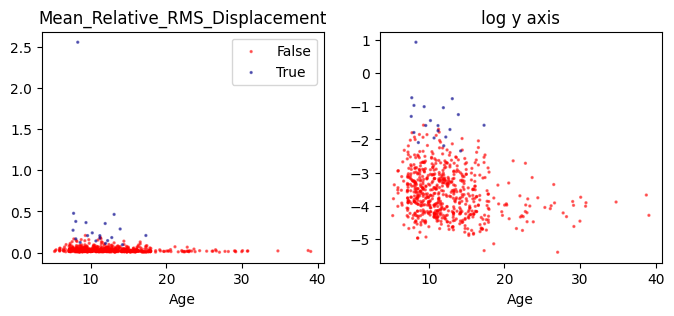

In [24]:
scatter_motion('Mean_Relative_RMS_Displacement',cats_by = "Exclude")

c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
C:\Users\nici9\AppData\Local\Temp\ipykernel_17472\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


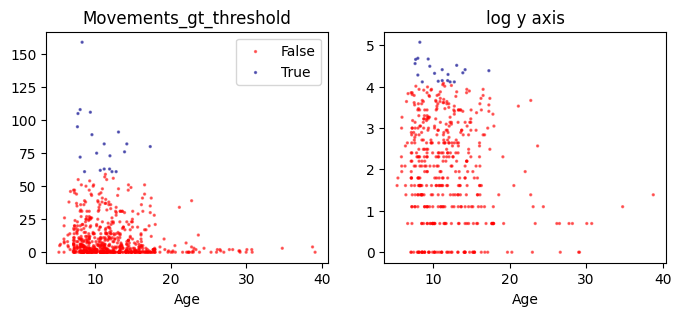

In [25]:
scatter_motion('Movements_gt_threshold',cats_by = "Exclude")

C:\Users\nici9\AppData\Local\Temp\ipykernel_17472\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


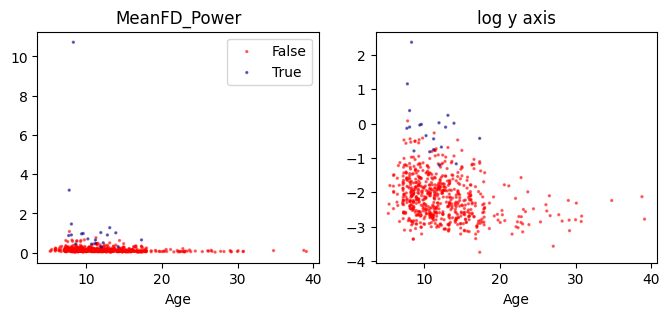

In [26]:
scatter_motion('MeanFD_Power',cats_by = "Exclude")

C:\Users\nici9\AppData\Local\Temp\ipykernel_17472\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


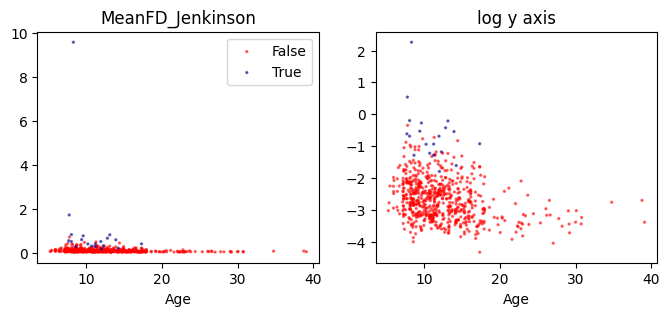

In [28]:
scatter_motion('MeanFD_Jenkinson',cats_by = "Exclude")

C:\Users\nici9\AppData\Local\Temp\ipykernel_17472\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


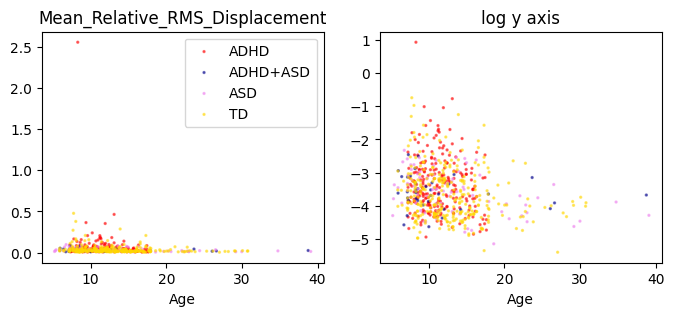

In [ ]:
scatter_motion('Mean_Relative_RMS_Displacement')

C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\

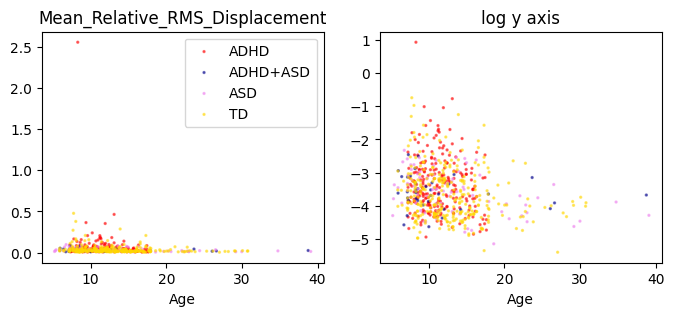

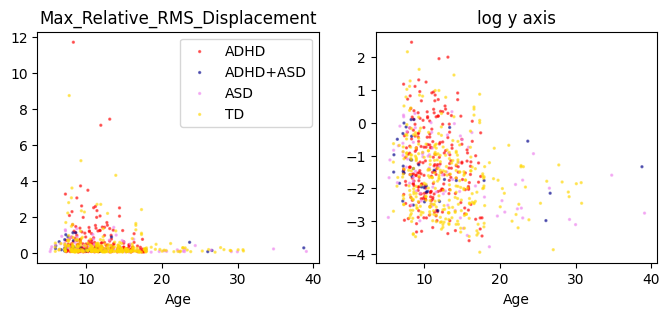

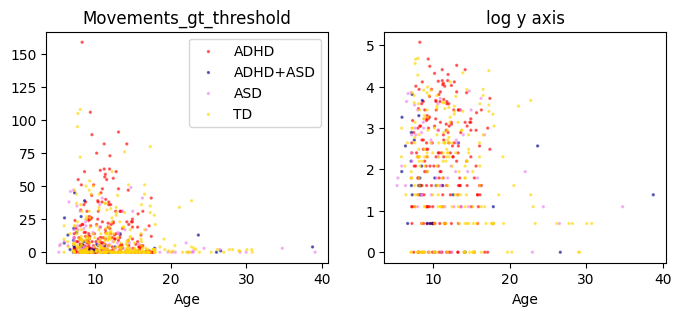

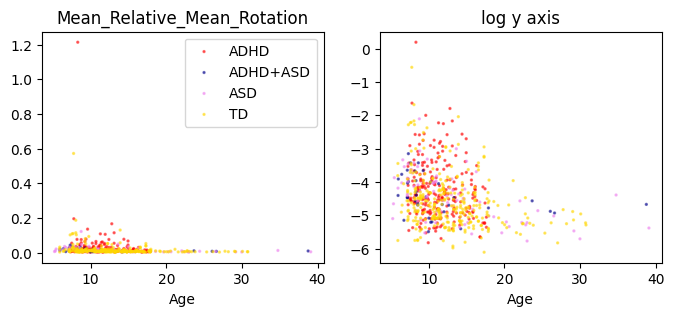

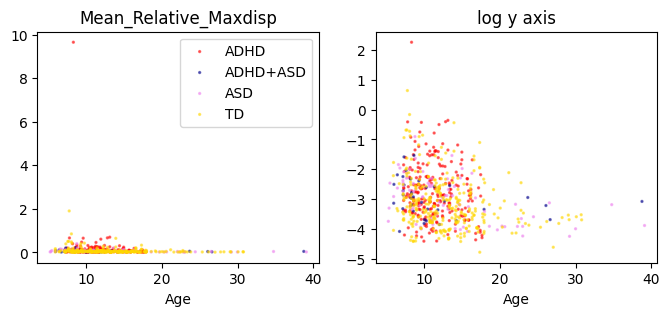

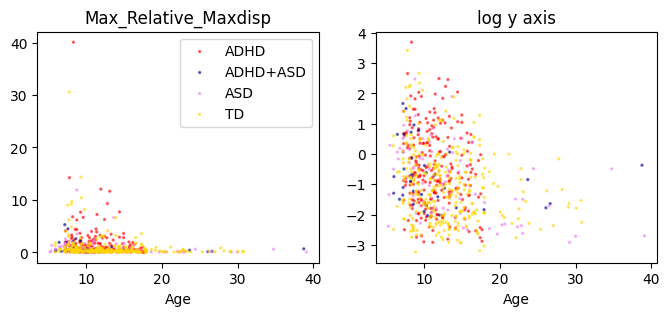

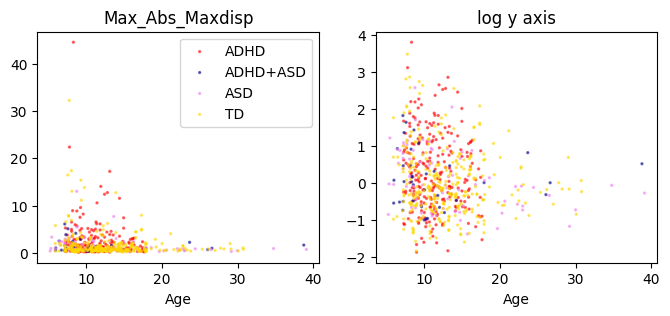

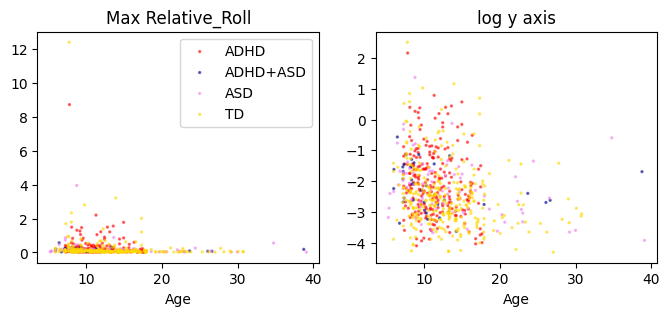

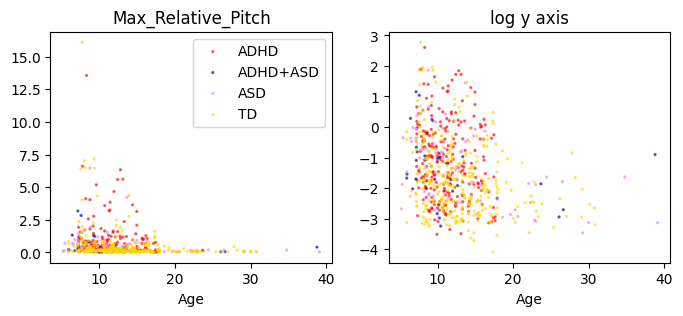

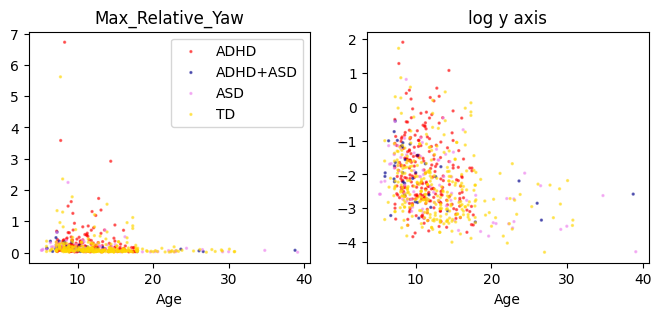

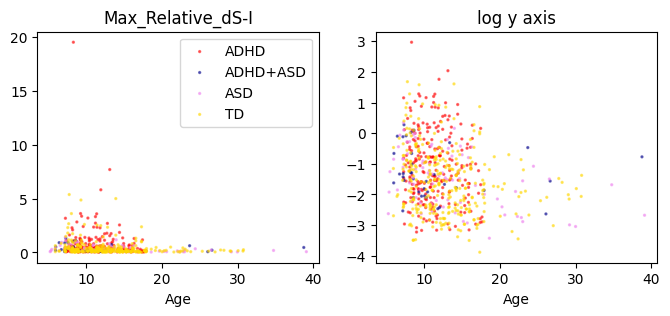

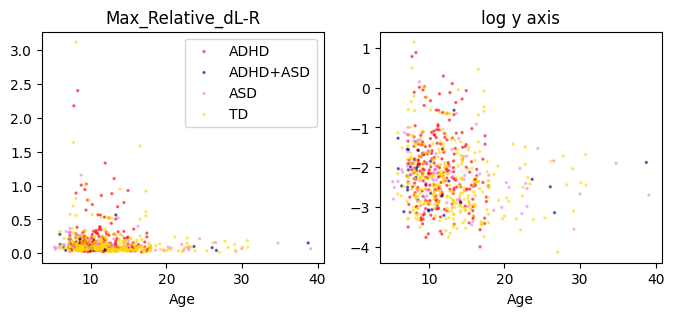

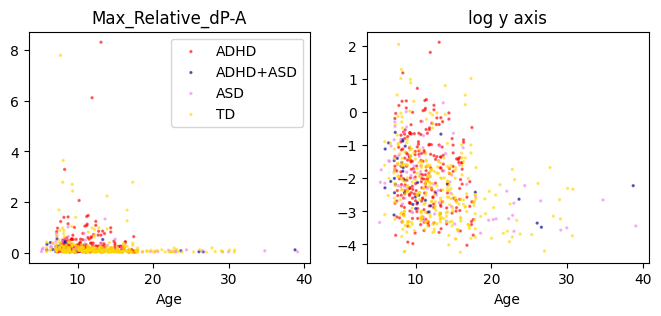

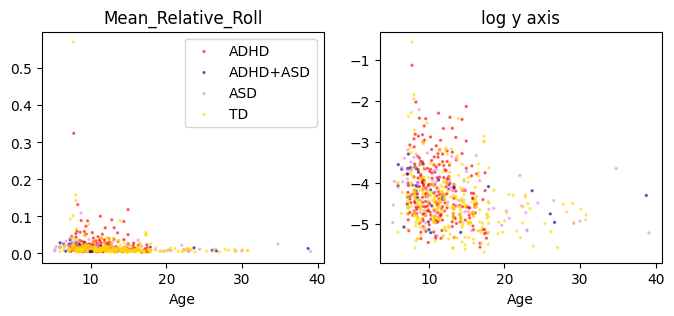

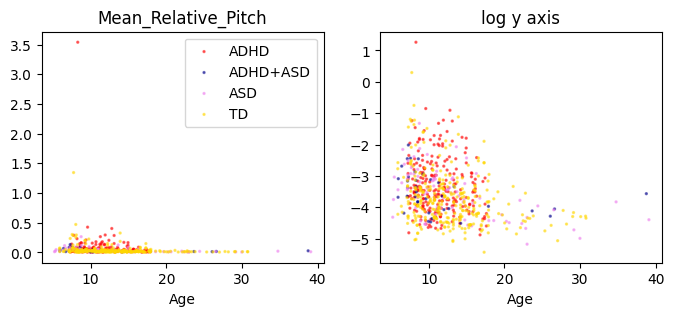

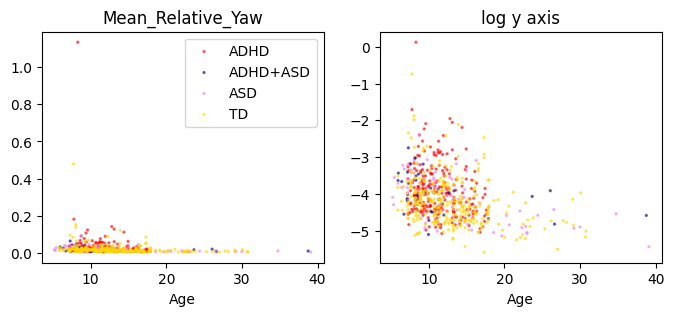

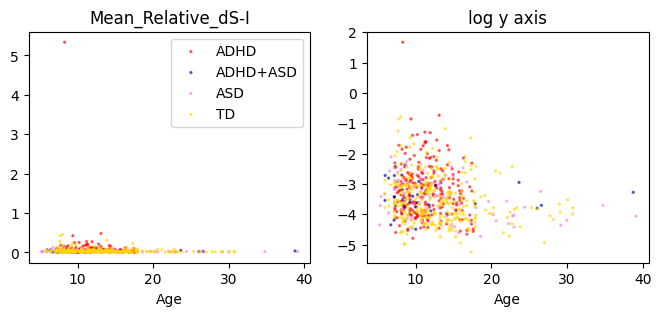

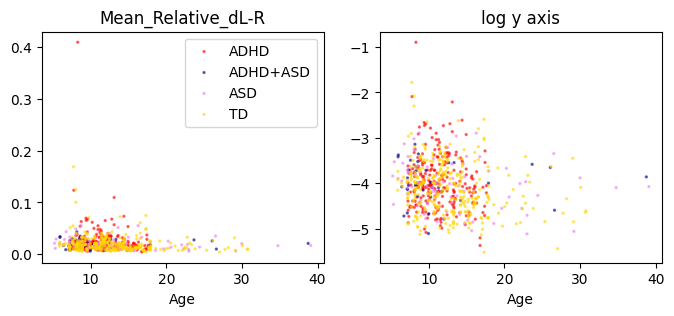

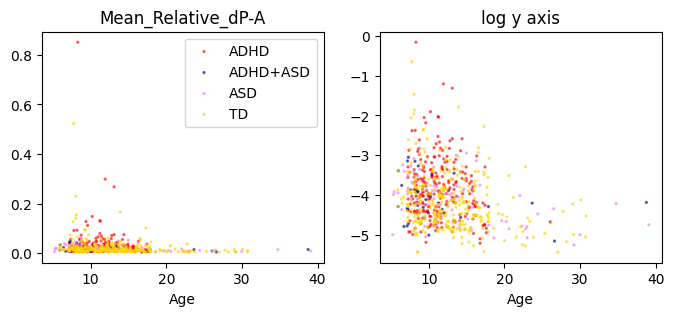

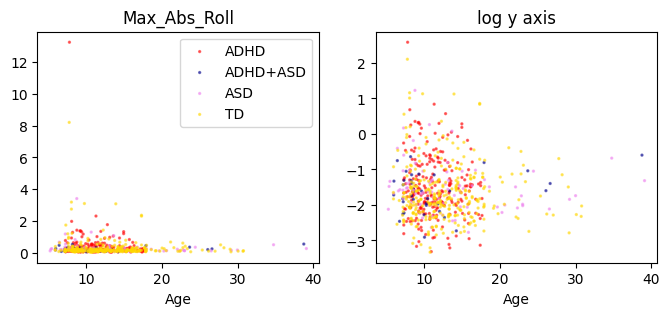

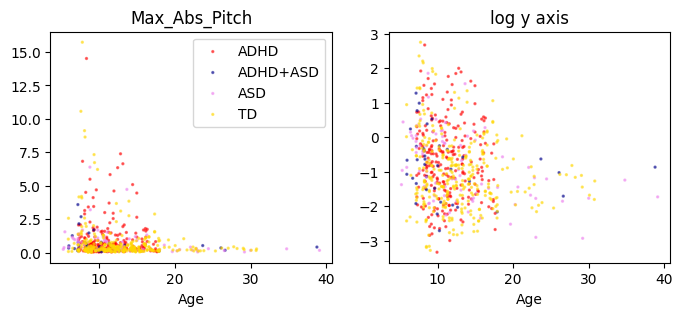

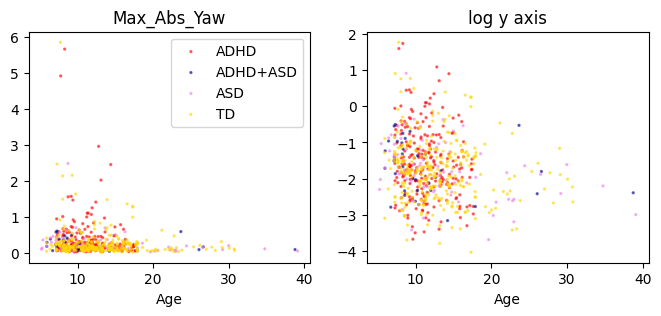

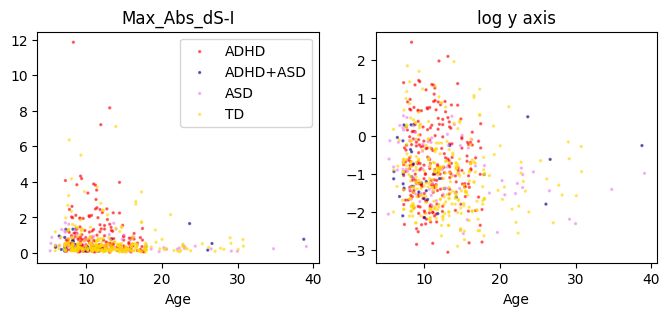

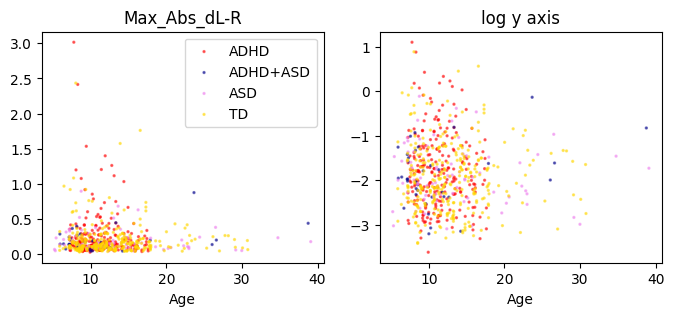

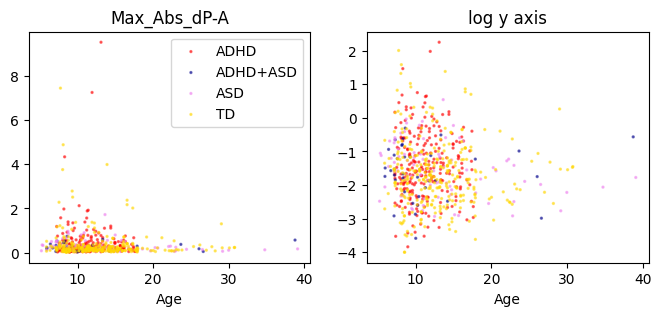

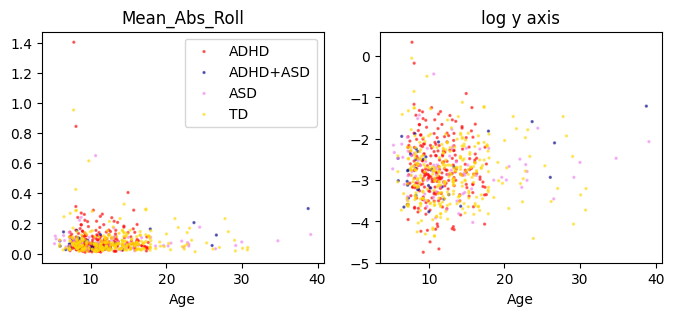

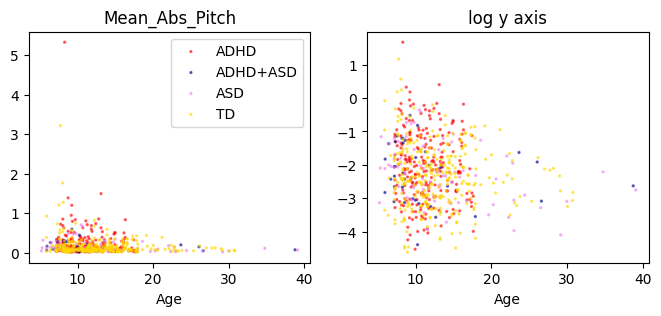

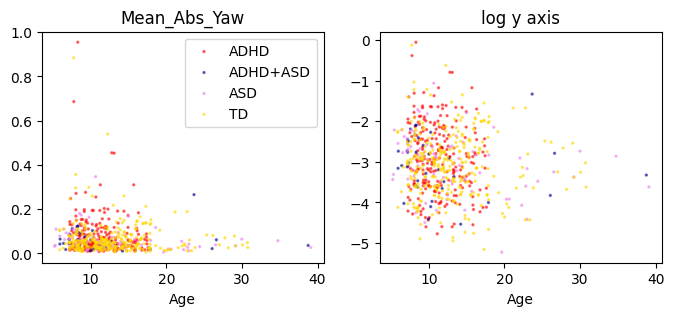

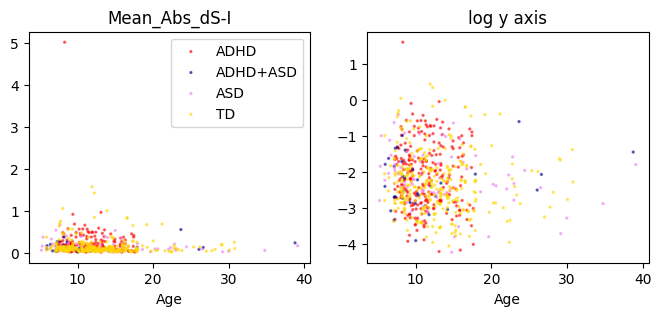

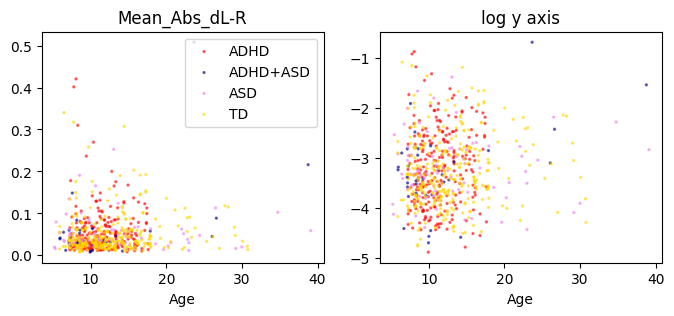

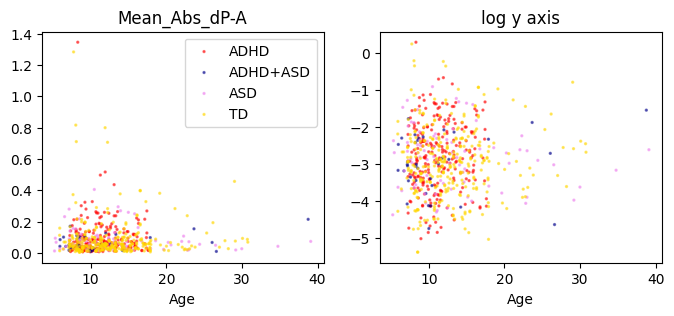

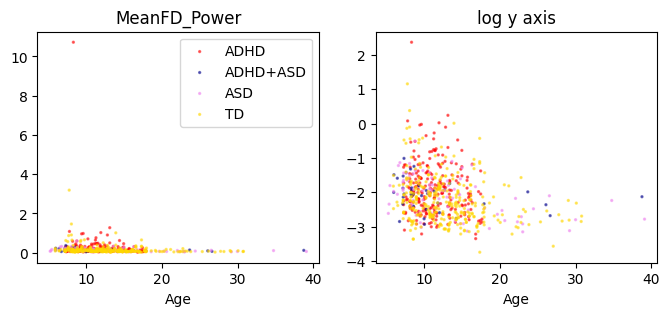

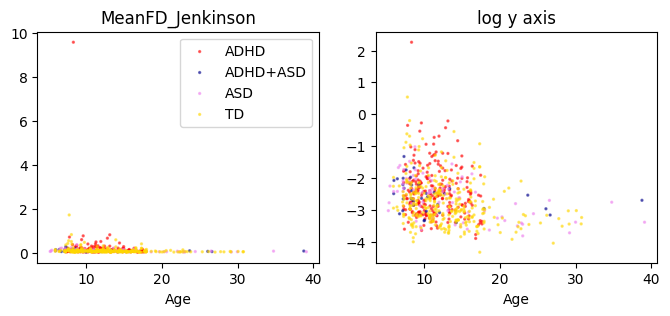

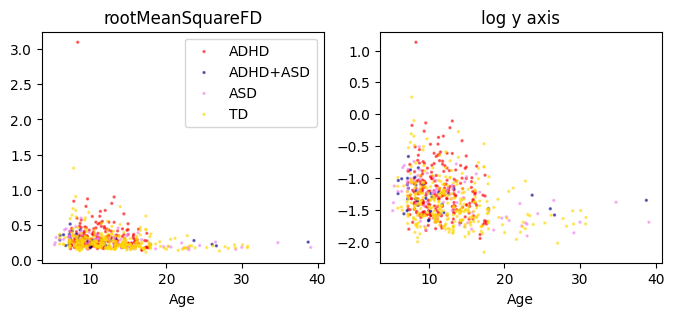

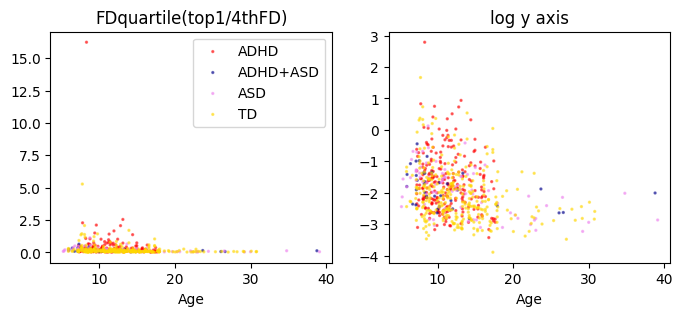

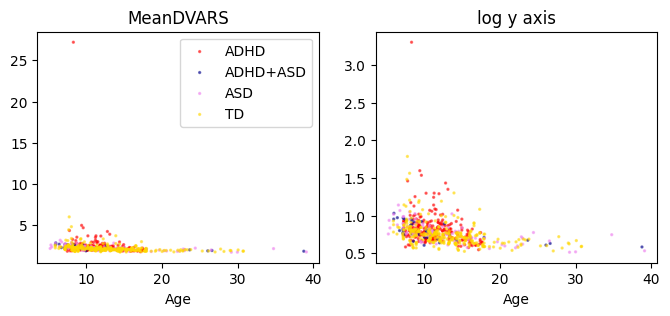

In [23]:
for column in motion_df.columns[3:]:
    scatter_motion(column)

C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\38716

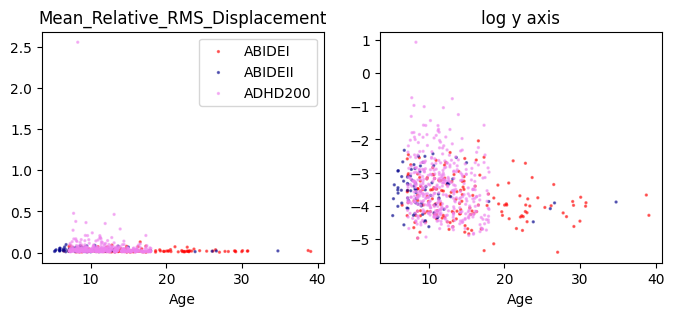

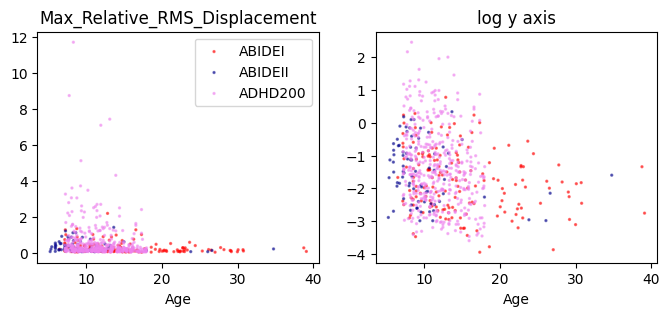

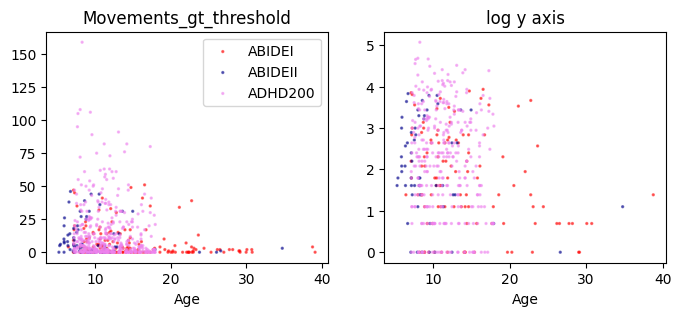

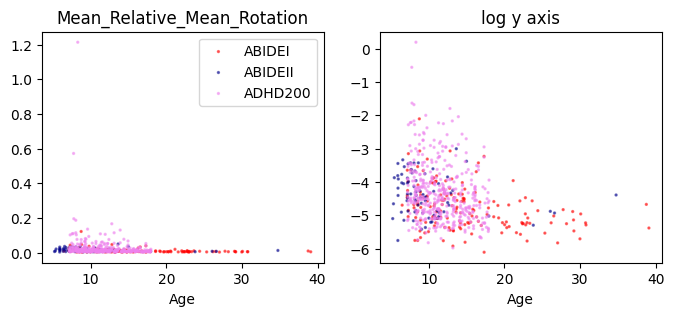

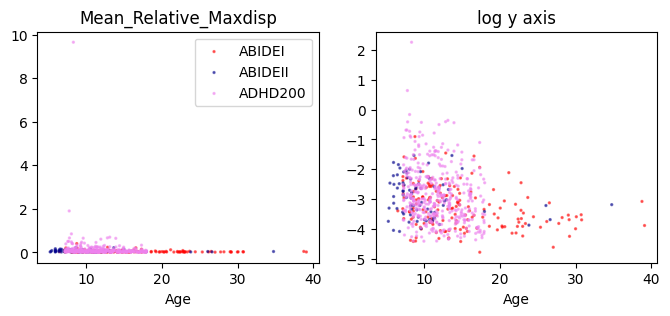

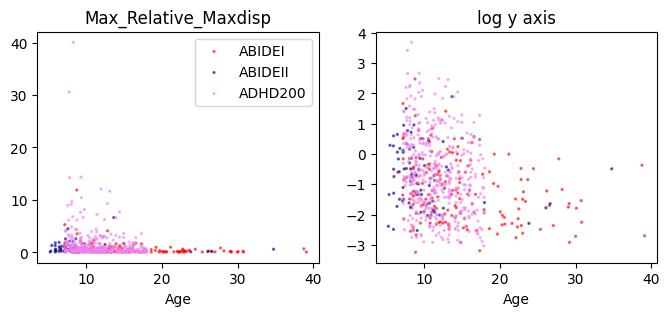

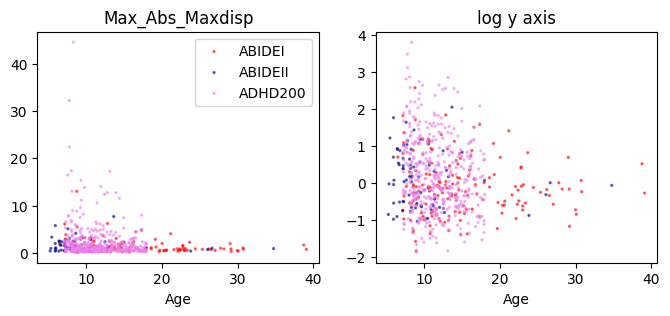

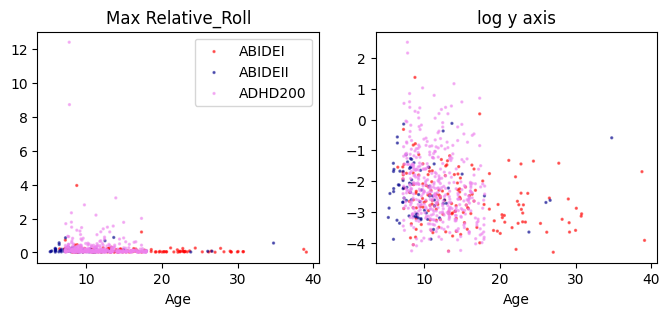

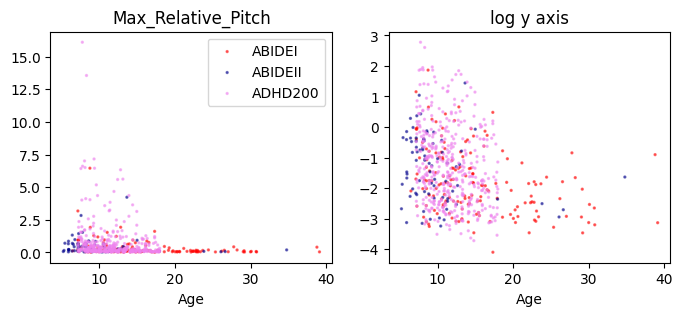

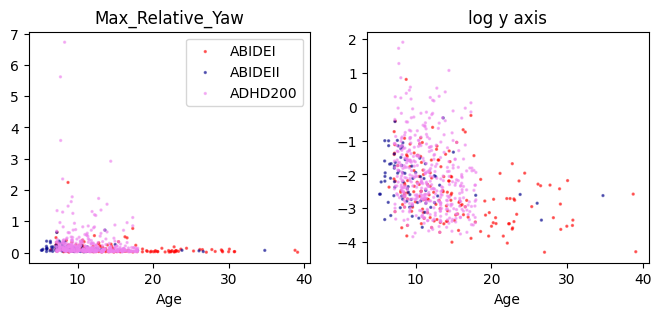

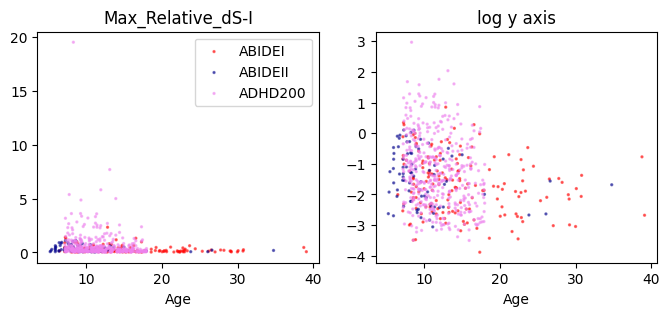

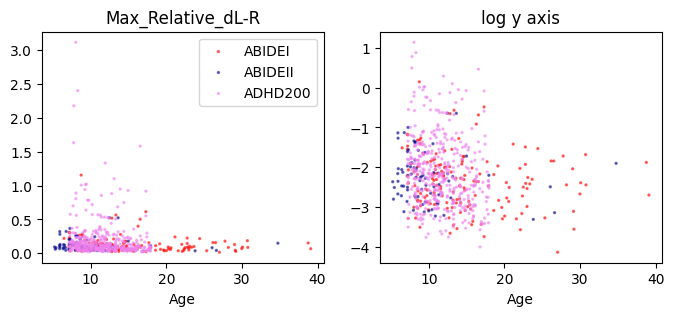

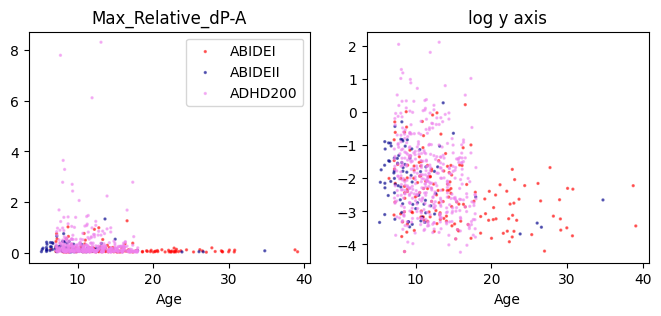

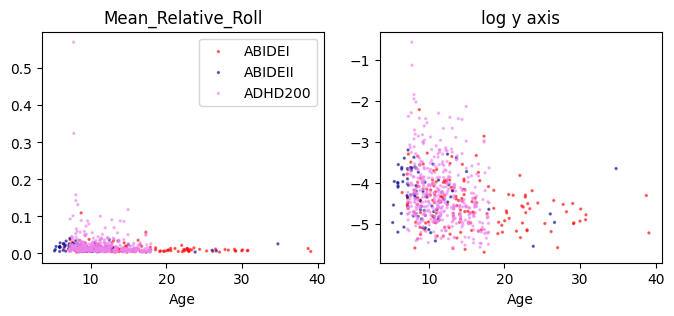

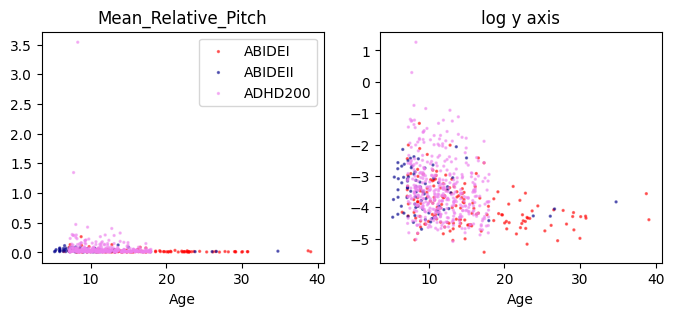

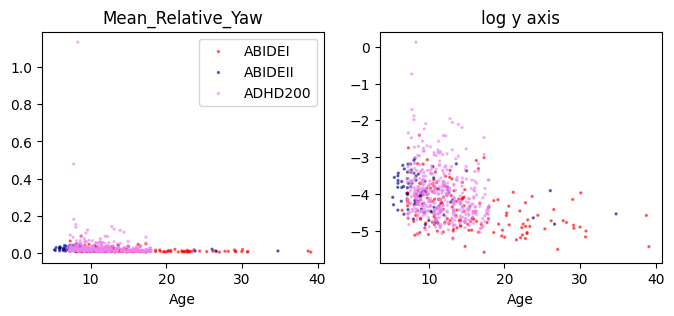

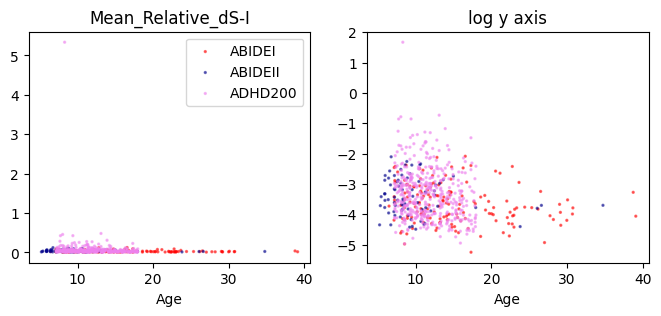

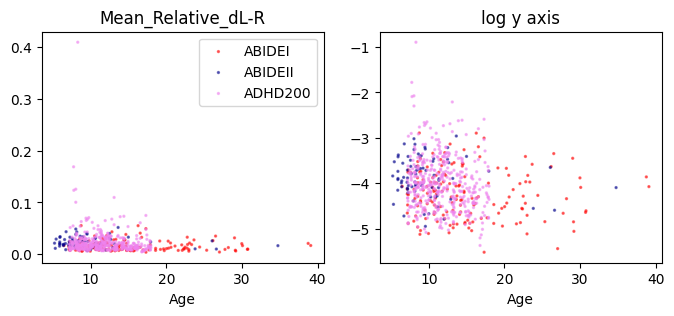

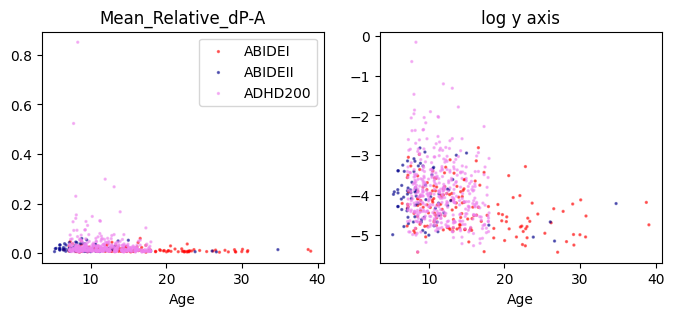

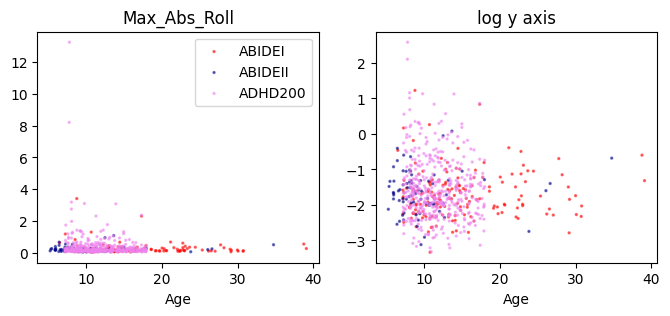

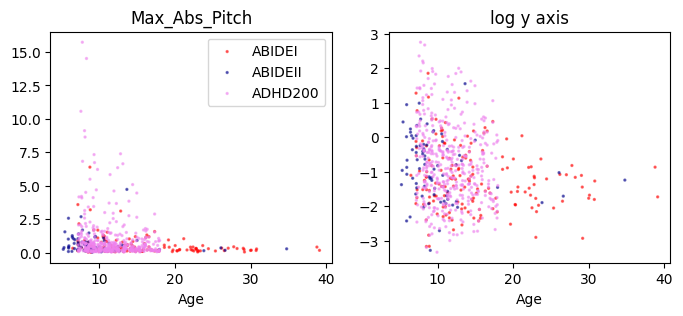

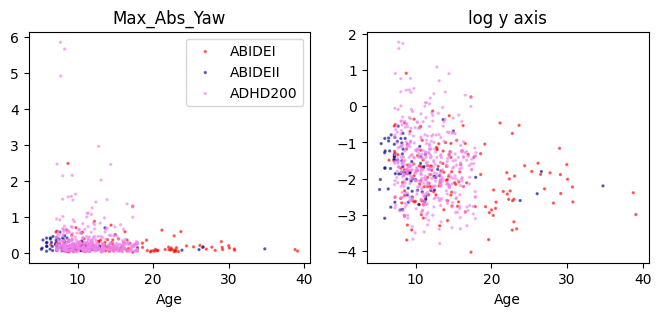

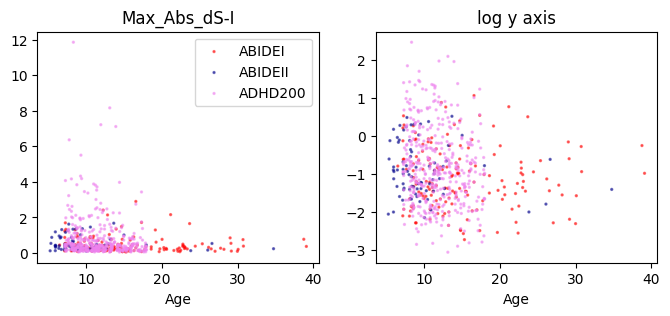

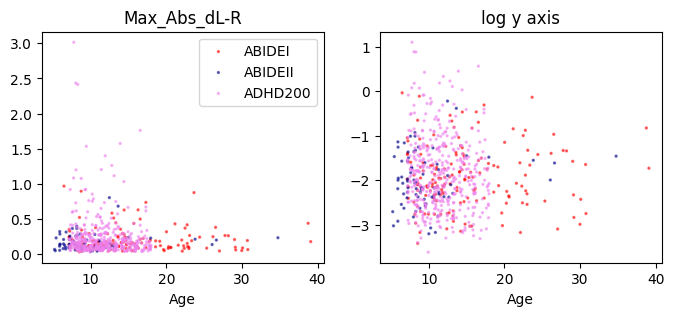

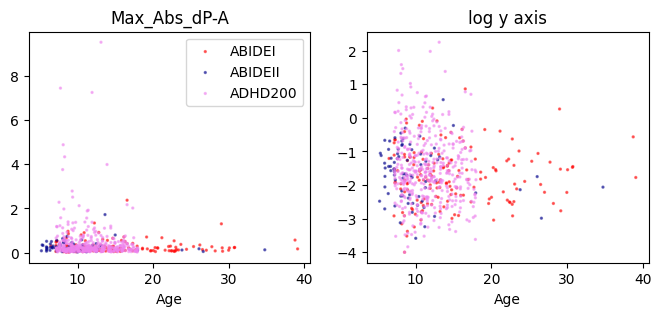

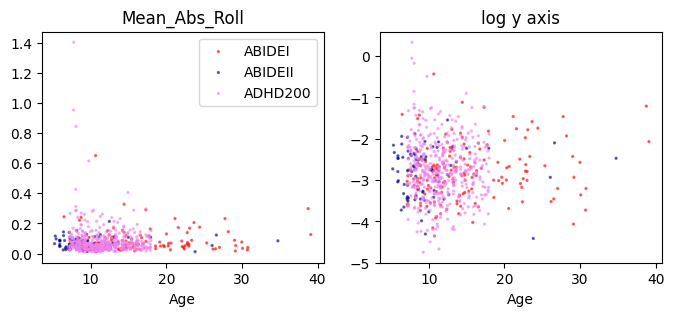

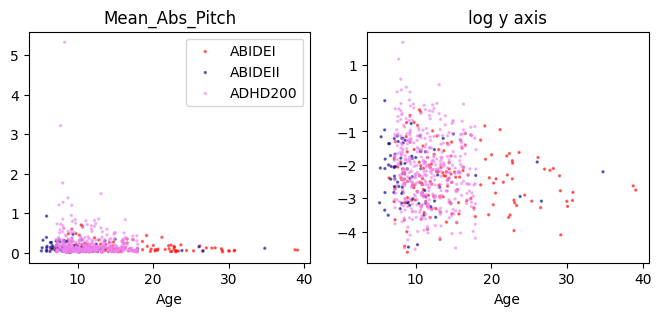

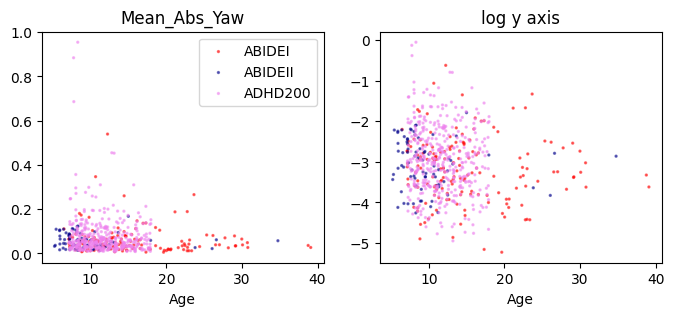

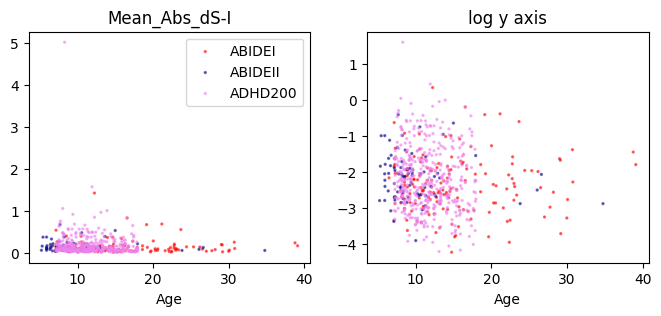

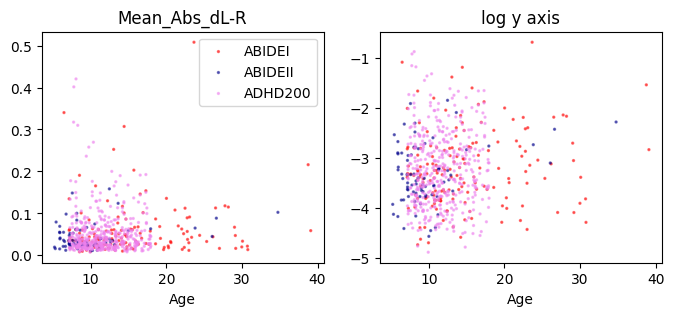

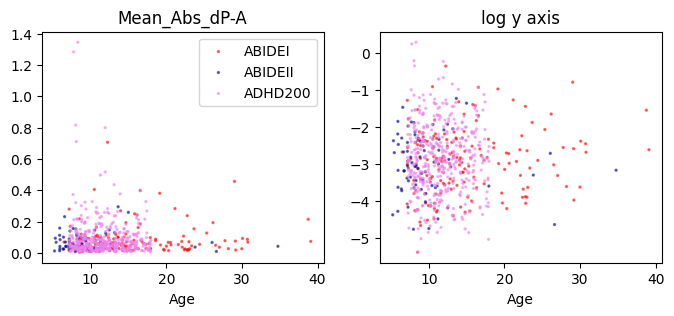

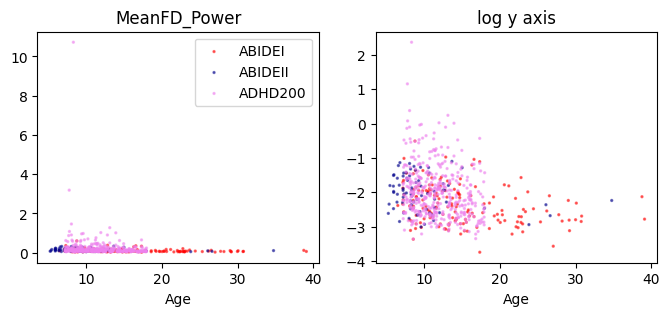

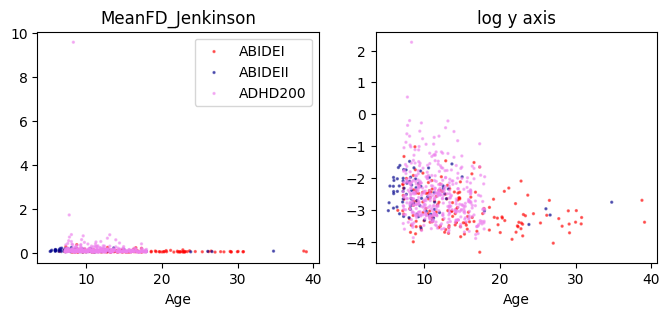

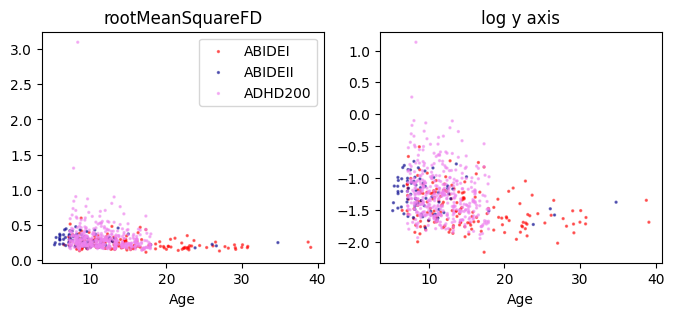

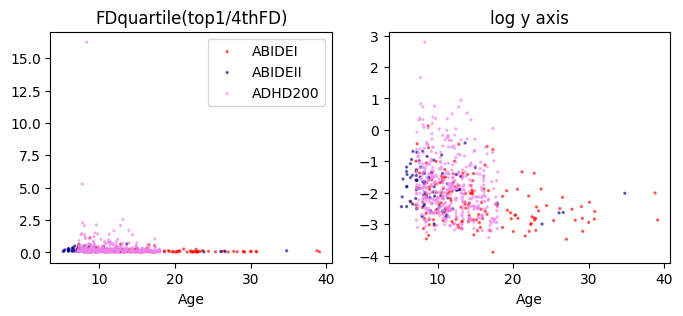

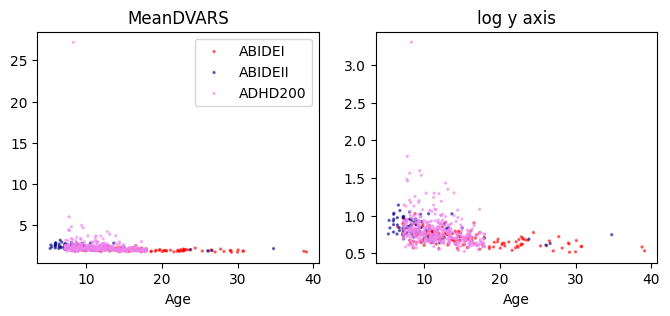

In [24]:
for column in motion_df.columns[3:]:
    scatter_motion(column,cats_by="Dataset")

C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\

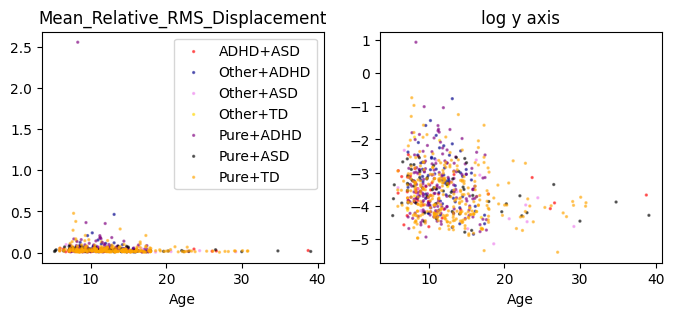

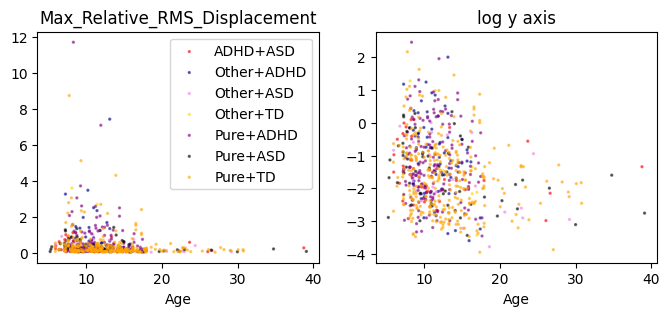

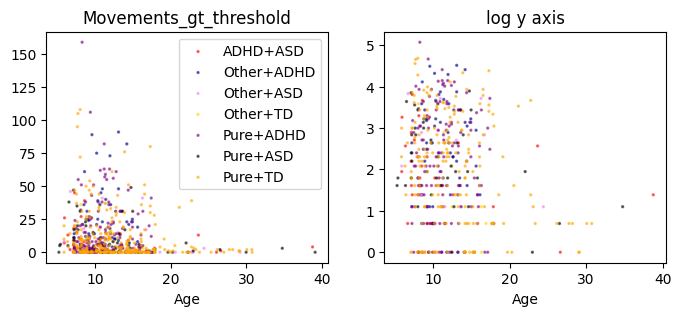

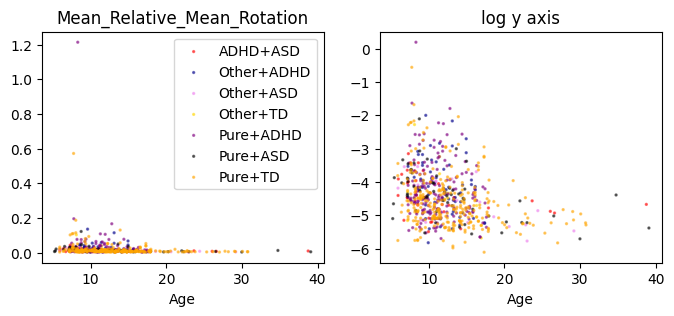

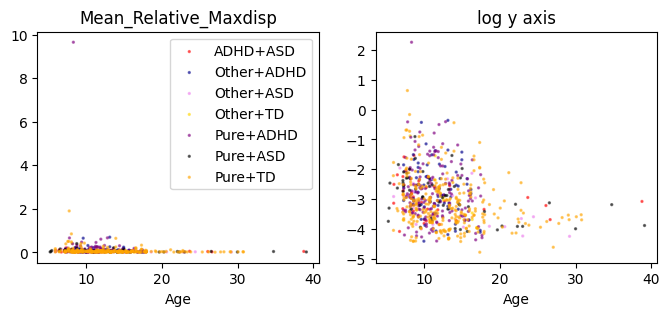

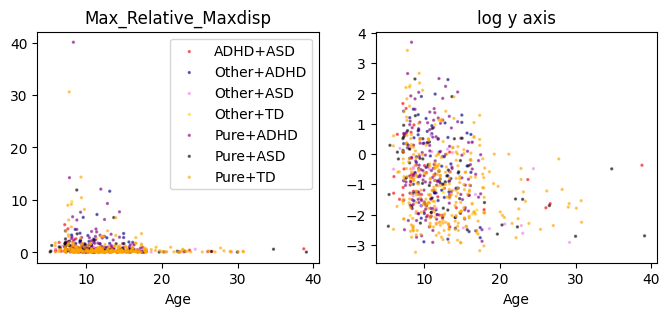

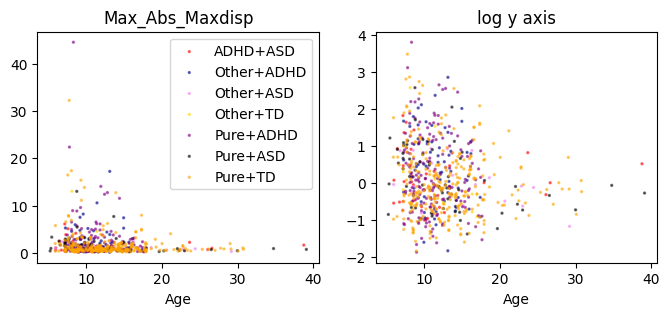

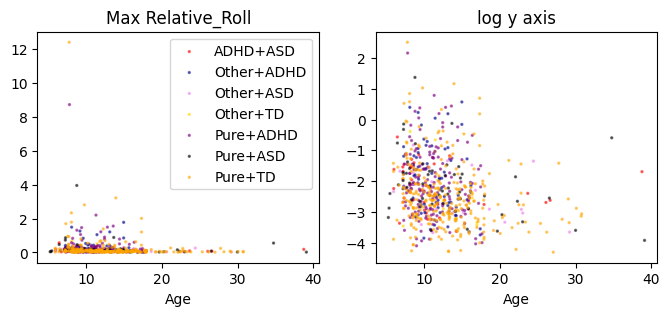

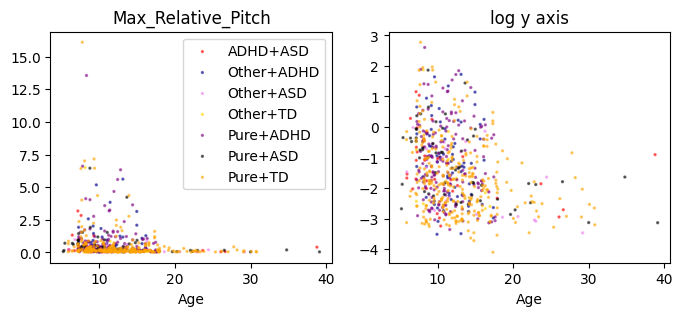

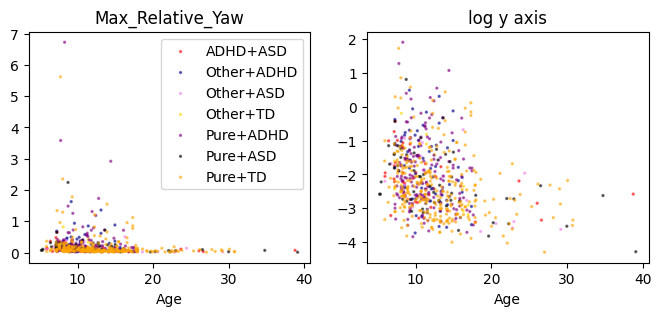

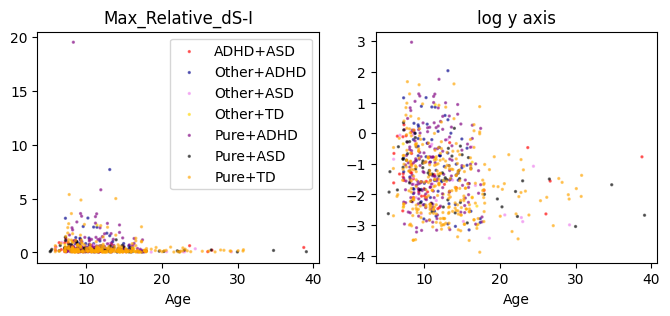

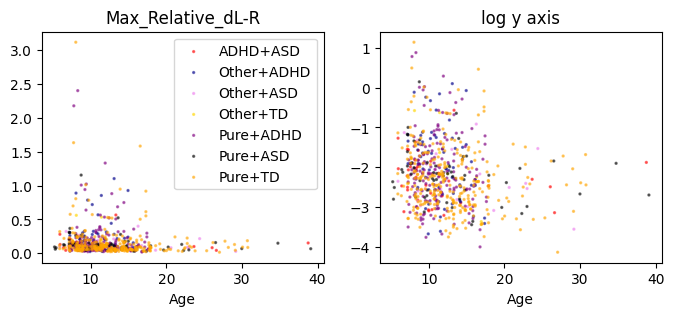

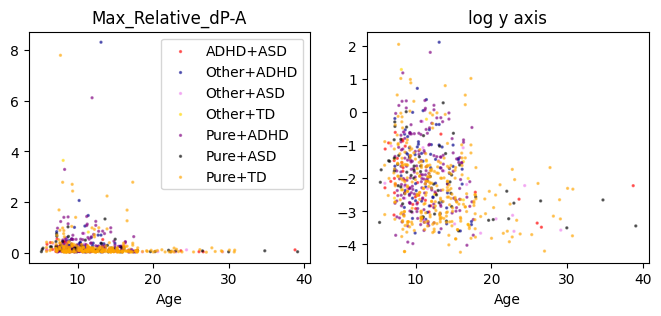

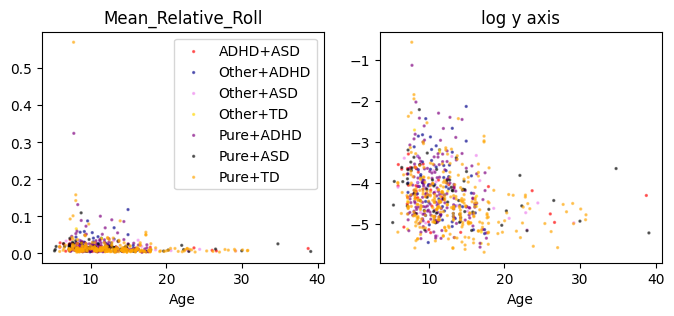

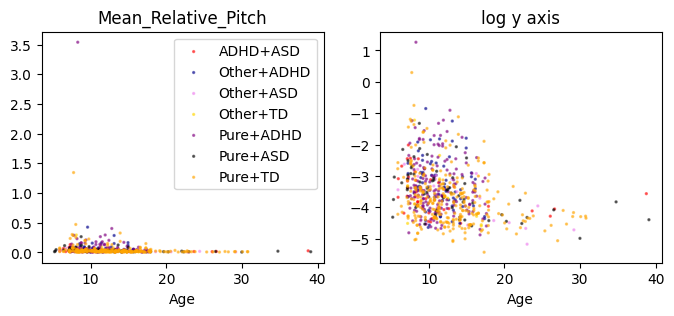

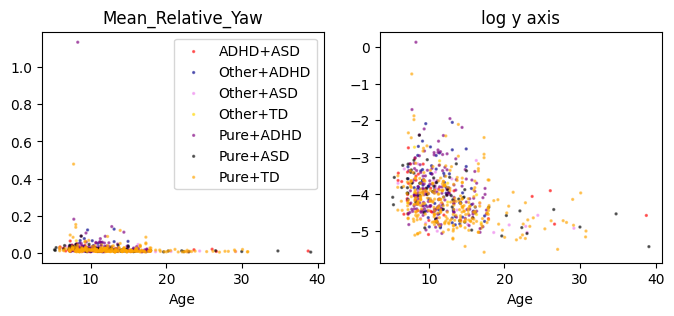

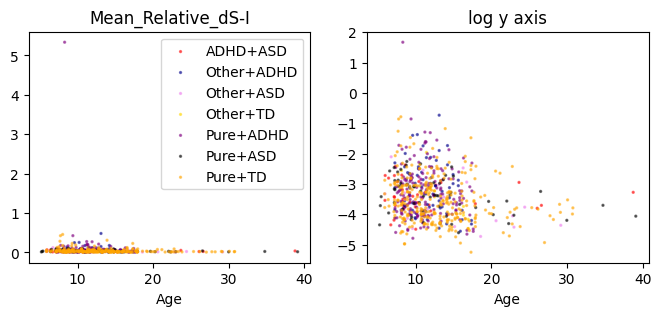

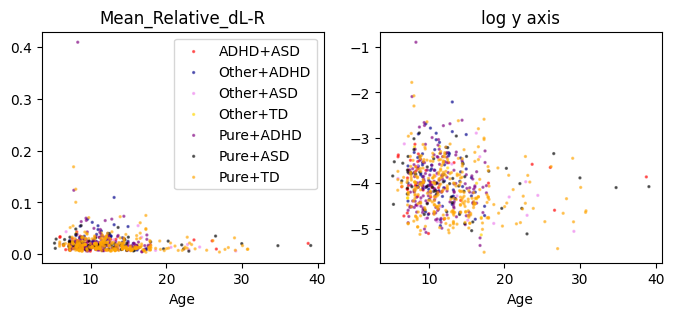

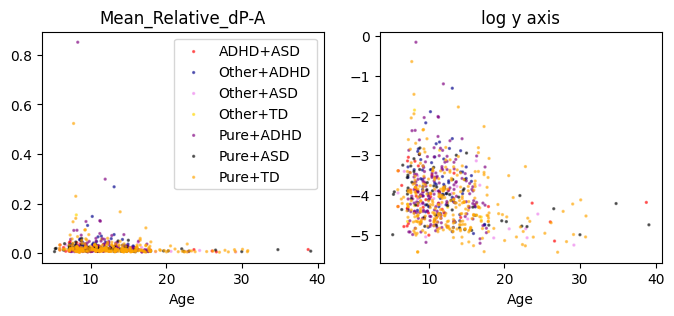

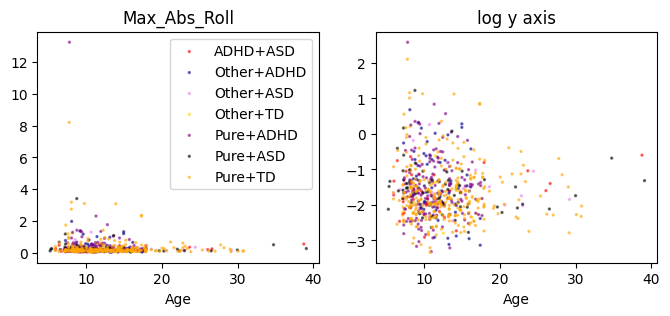

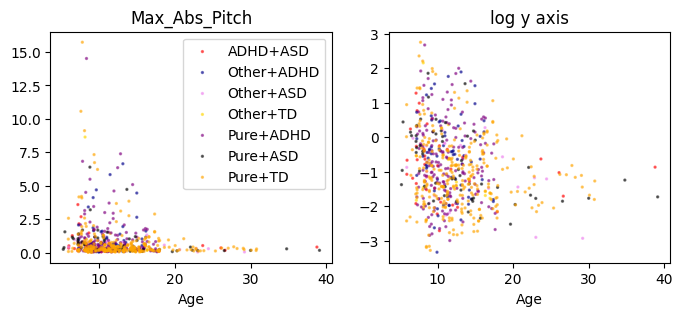

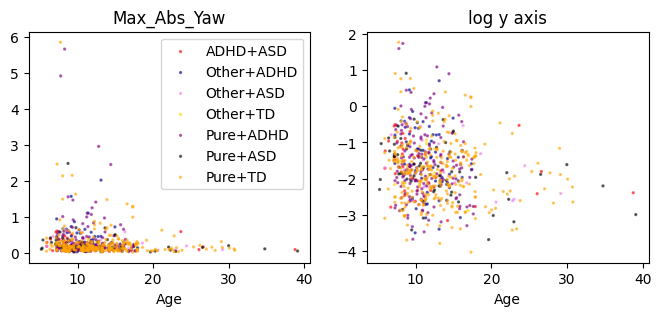

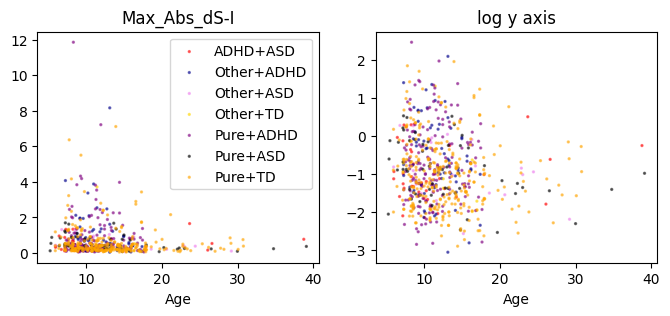

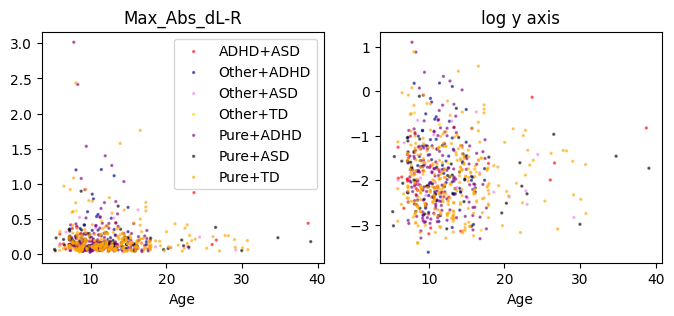

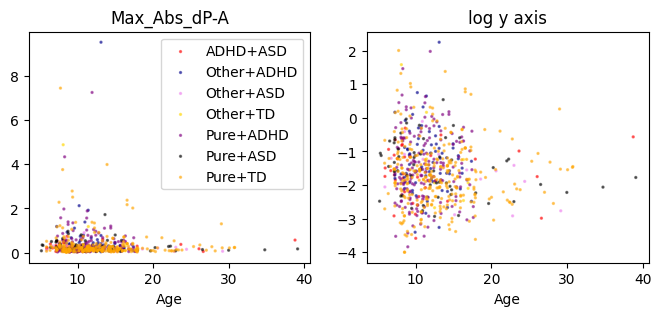

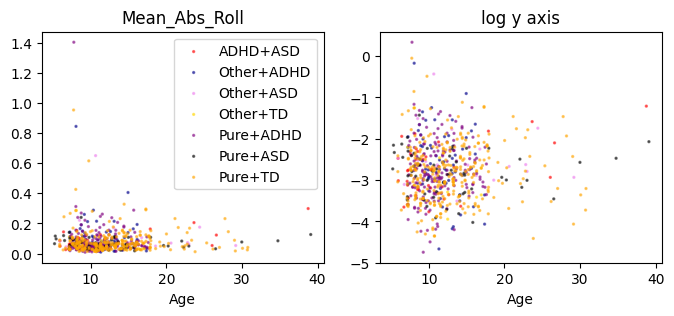

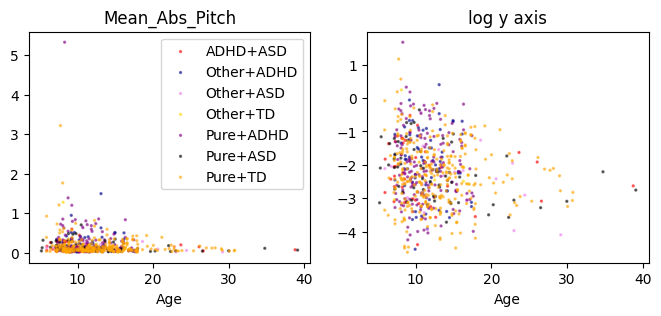

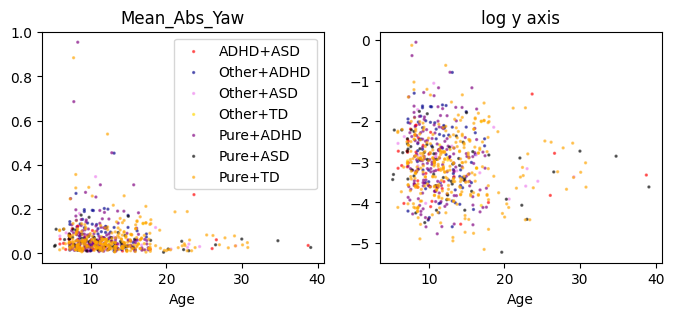

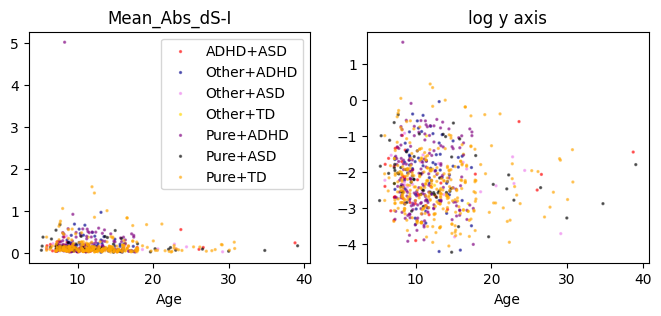

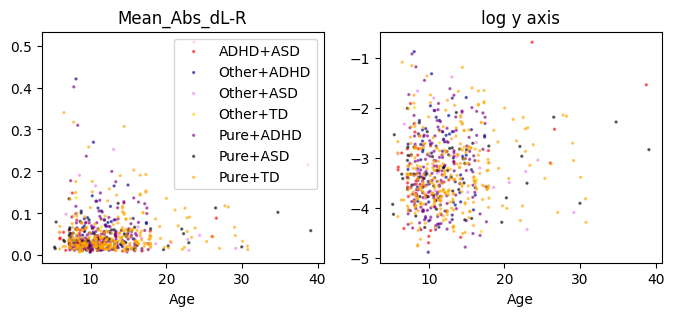

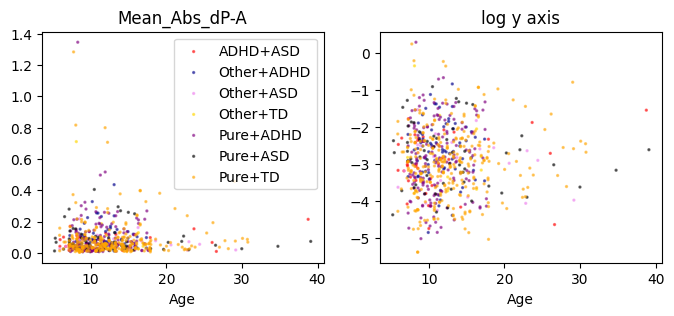

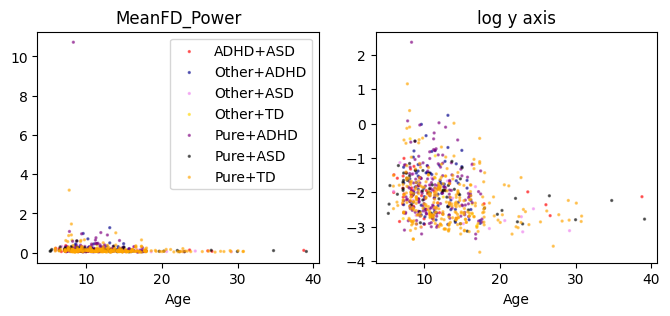

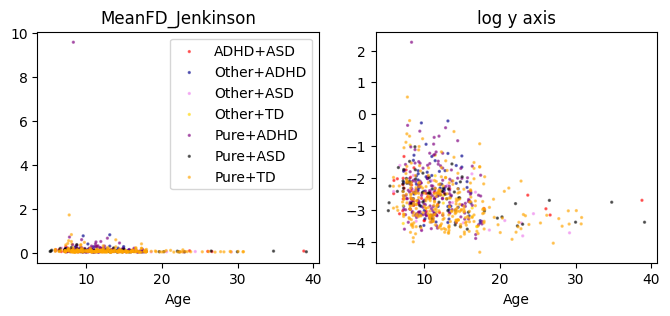

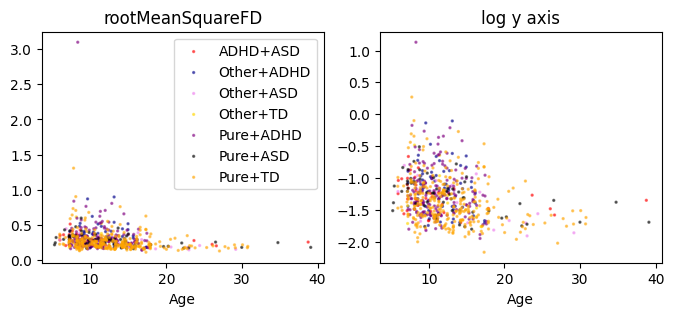

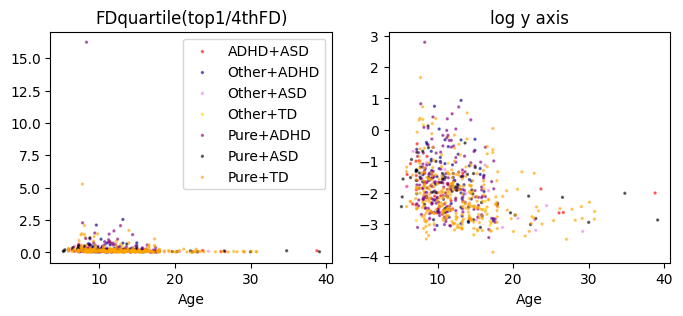

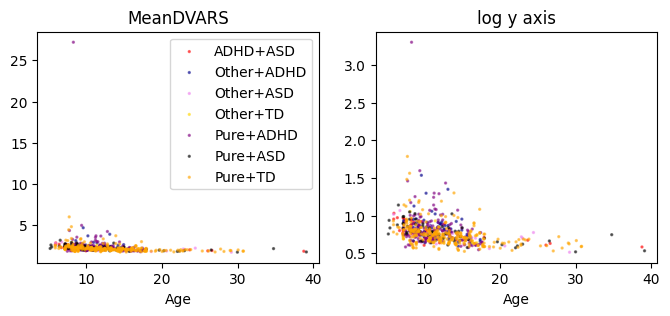

In [25]:
for column in motion_df.columns[3:]:
    scatter_motion(column,cats_by="Detailed_Label")

more head motion in younger people, as expected

the ADHD 200 data is lower quality in terms of head motion statistics

In [26]:
motion_lab_df["Sex"] = motion_lab_df["Sex"].fillna("None")

C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
c:\Users\nici9\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:672: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_12256\3871656622.py:17: UserWarning: FigureCanvasAgg is non-intera

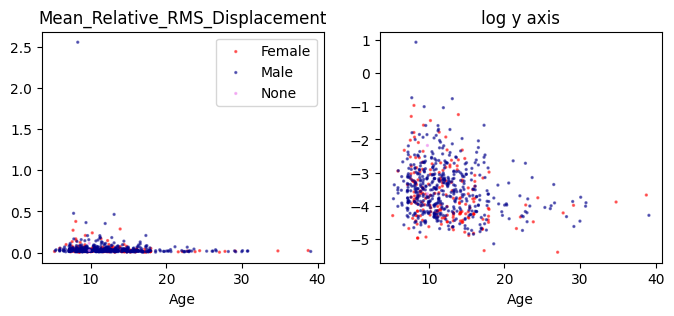

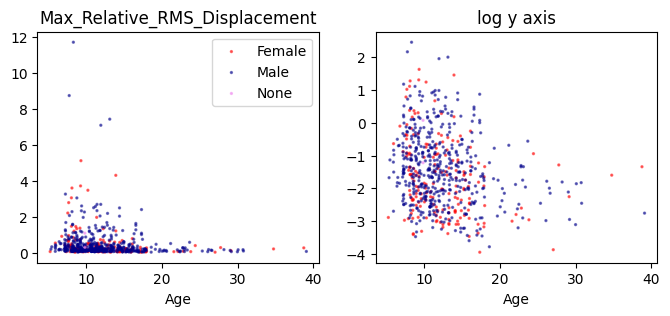

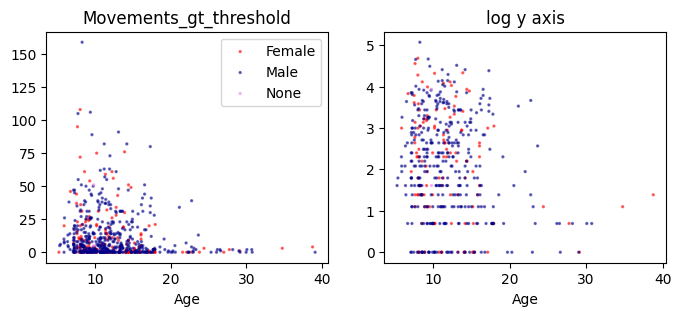

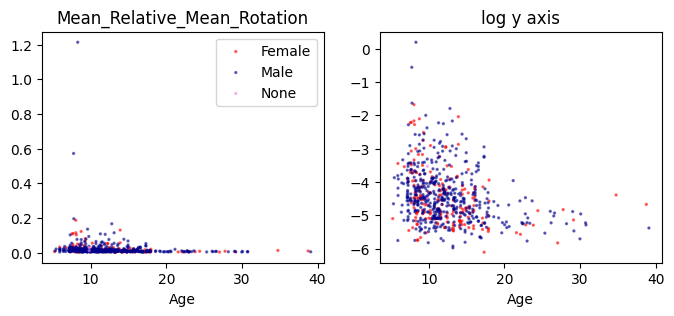

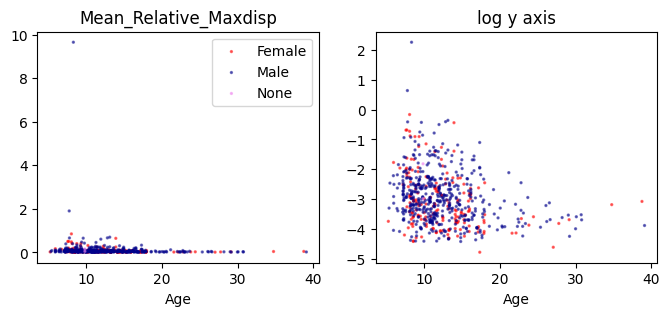

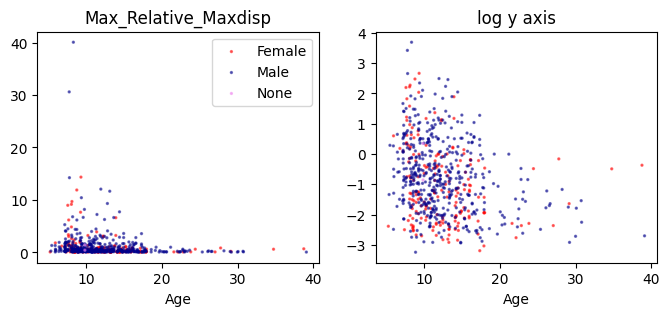

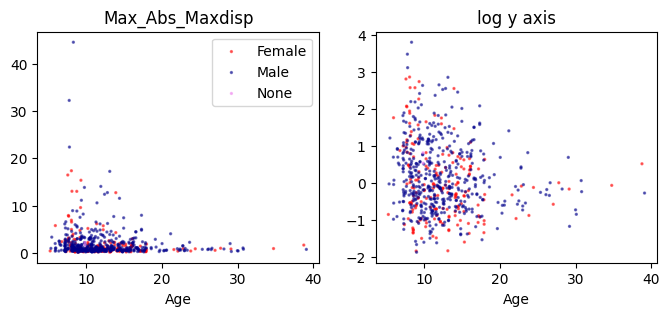

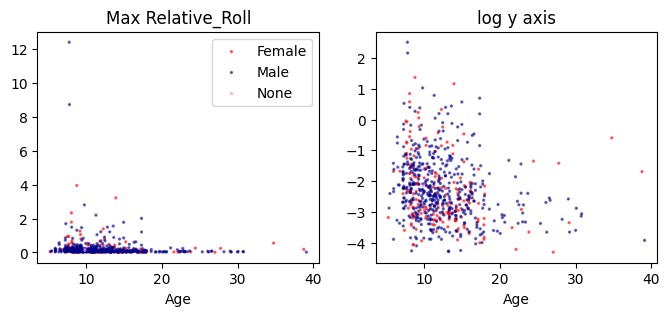

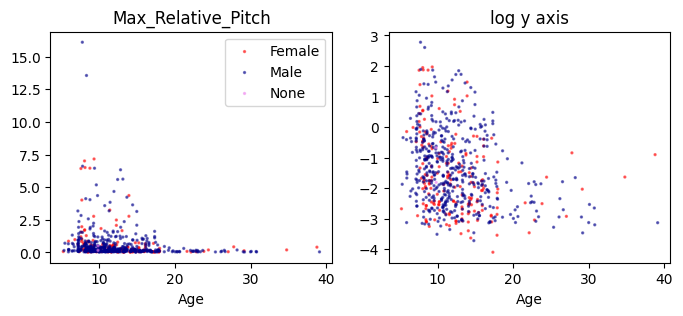

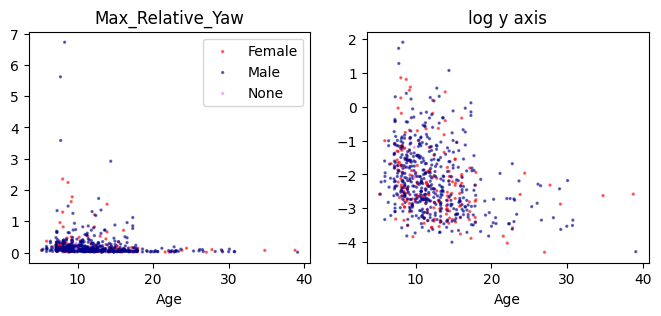

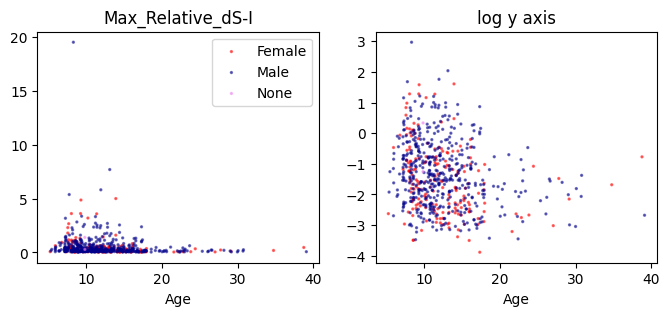

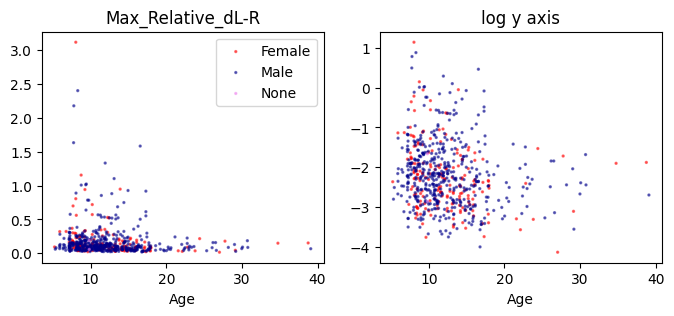

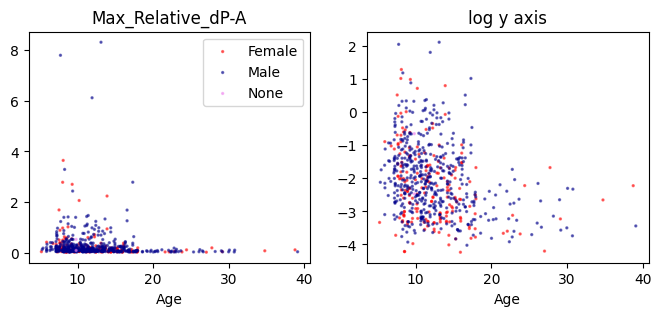

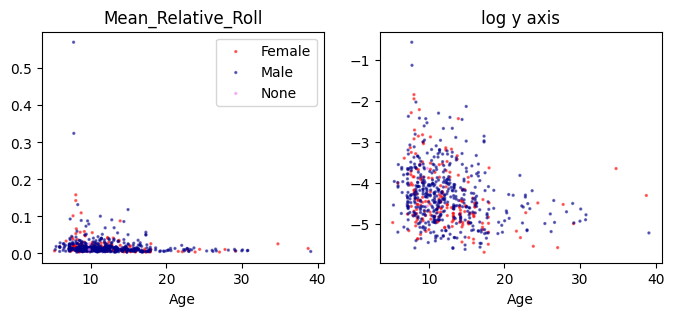

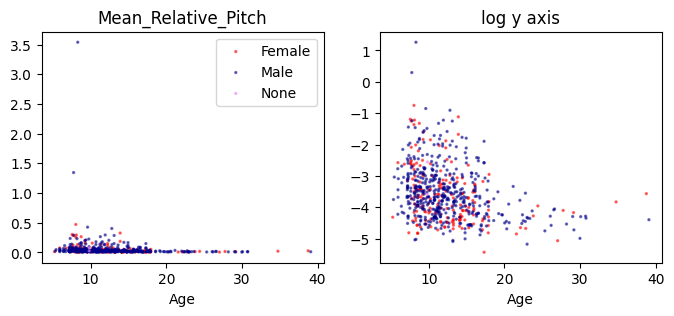

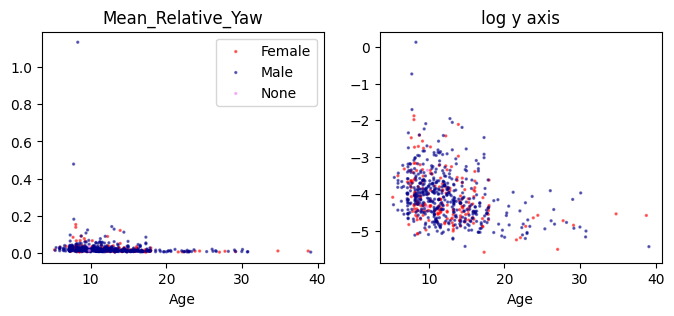

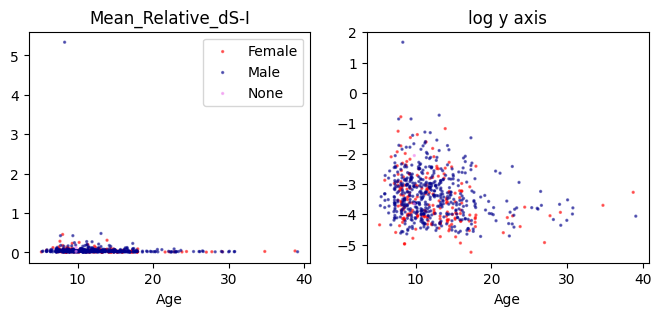

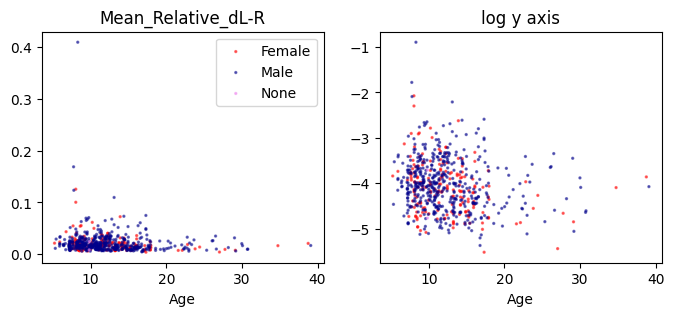

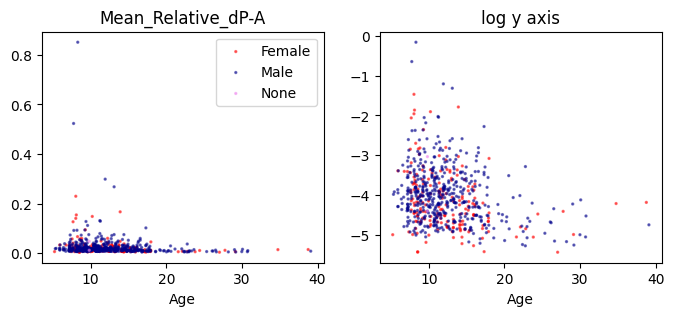

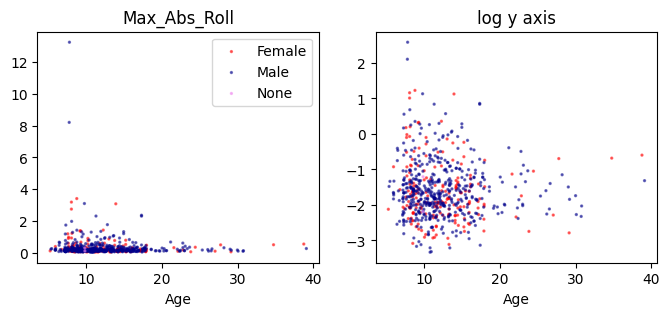

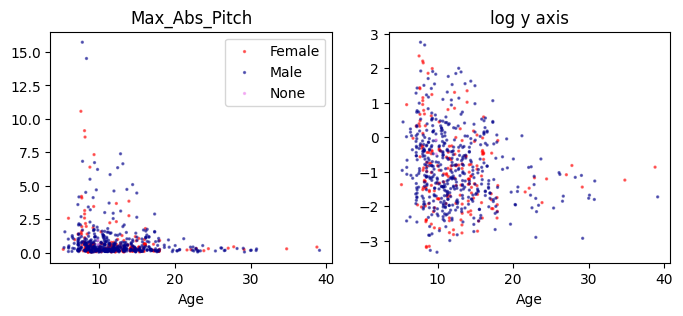

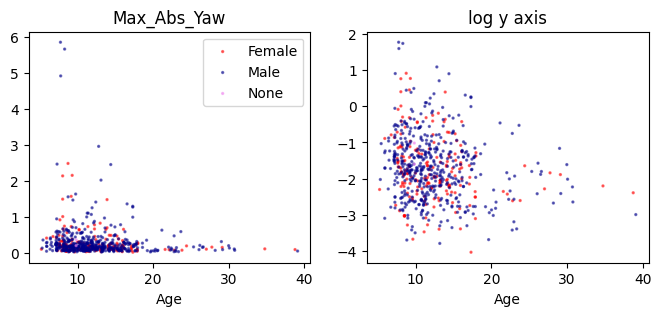

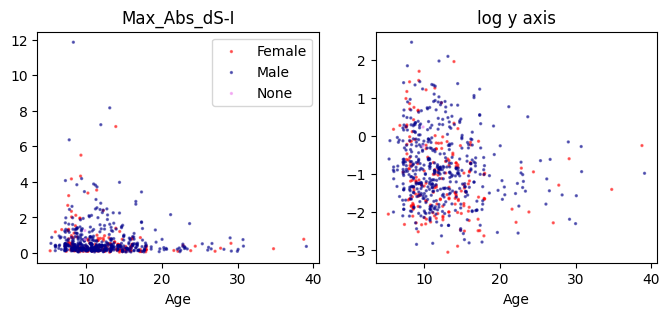

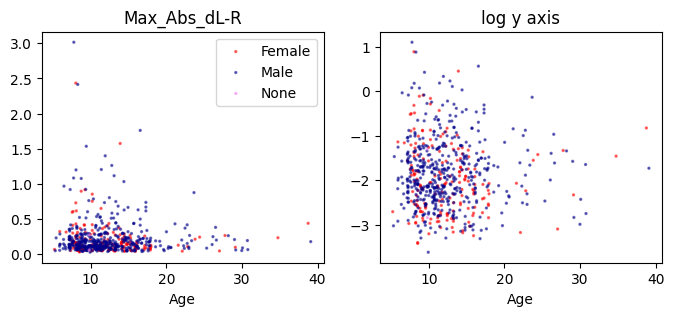

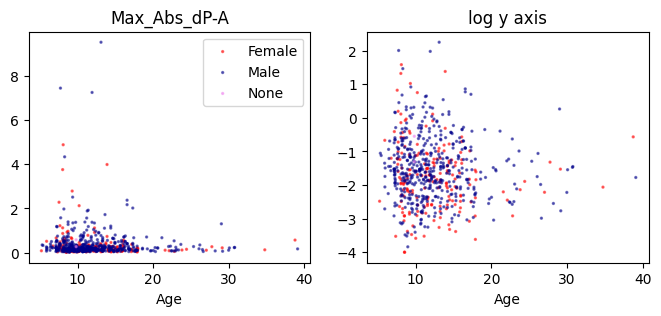

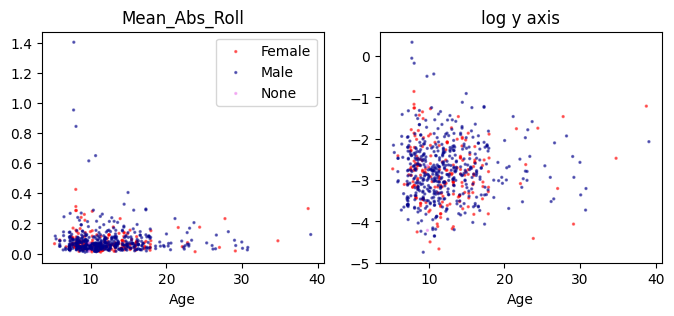

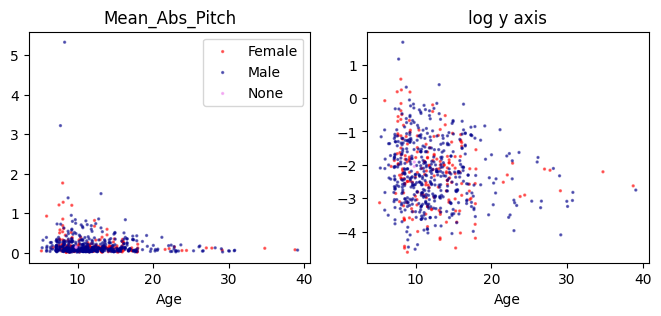

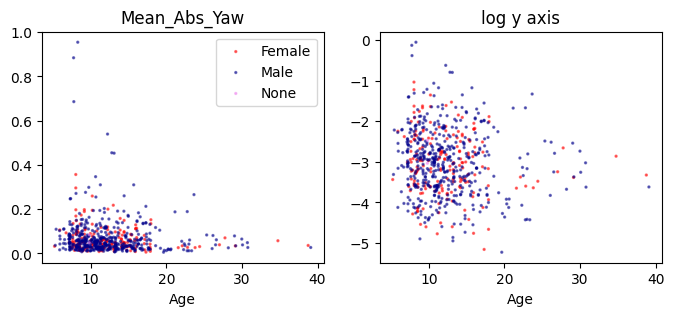

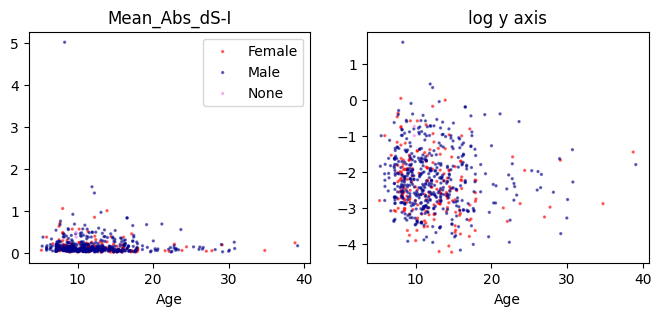

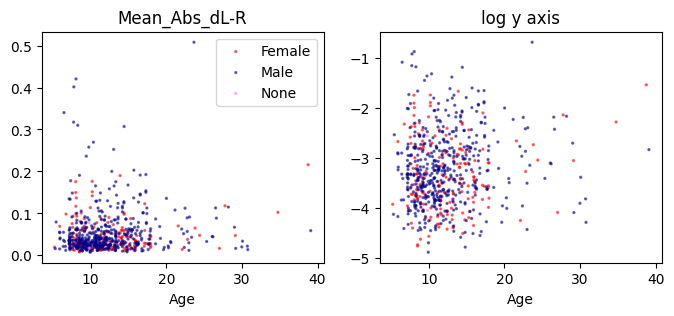

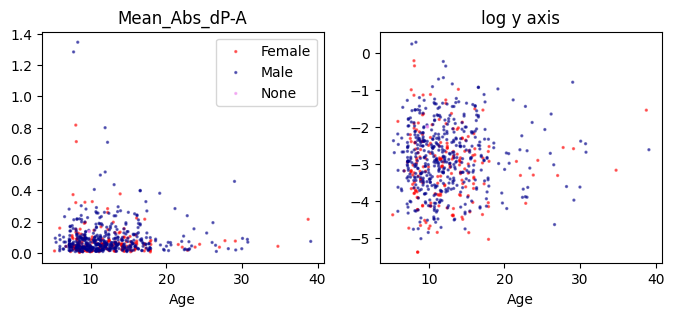

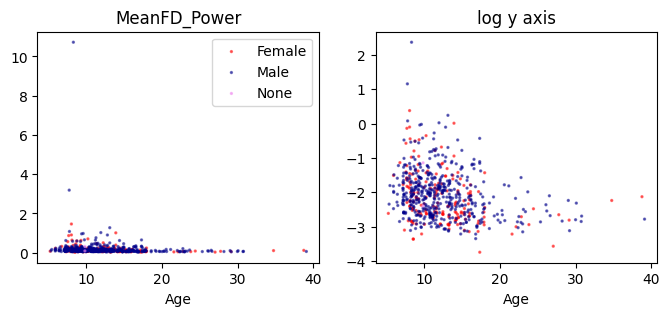

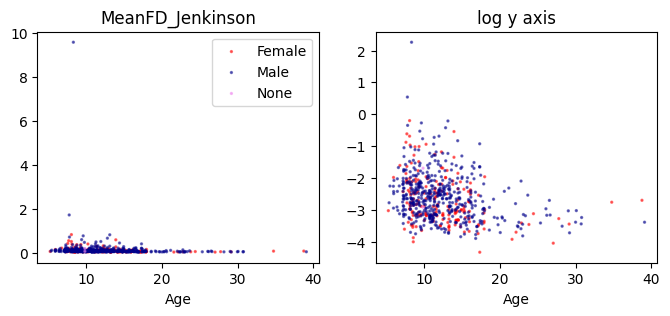

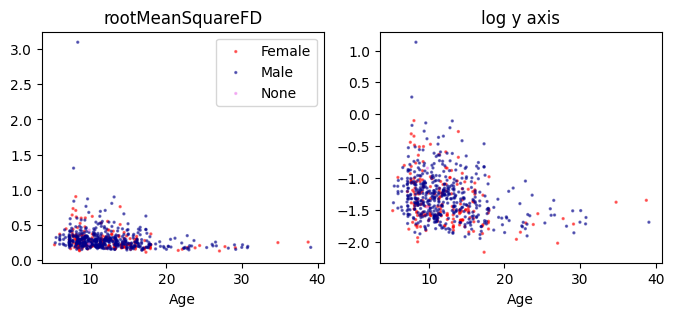

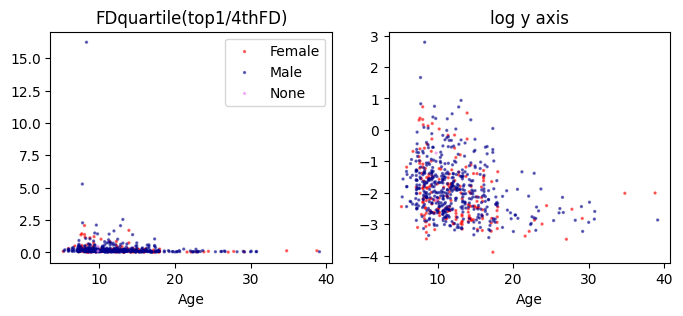

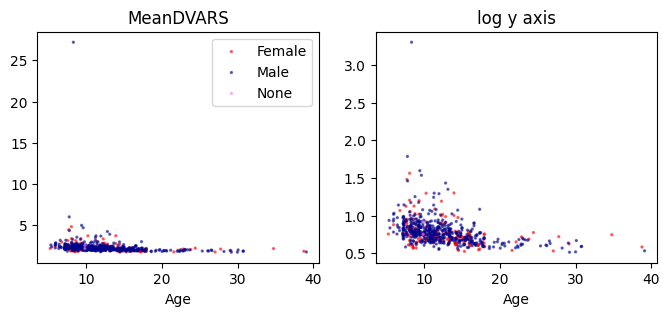

In [27]:
for column in motion_df.columns[3:]:
    scatter_motion(column,cats_by="Sex")

#### make some summary stats

In [15]:
motion_lab_df.groupby(by="Sex").mean(numeric_only=True) 

Sub ID        Age          IQ  Mean_Relative_RMS_Displacement  \
Sex                                                                            
Female      1243256.0  12.397718  108.306818                        0.038355   
Male    790222.568085  12.277157  109.172113                        0.046178   

        Max_Relative_RMS_Displacement  Movements_gt_threshold  \
Sex                                                             
Female                       0.409088               10.845745   
Male                         0.490476               12.406383   

        Mean_Relative_Mean_Rotation  Mean_Relative_Maxdisp  \
Sex                                                          
Female                     0.017739               0.076292   
Male                       0.020398               0.100399   

        Max_Relative_Maxdisp  Max_Abs_Maxdisp  ...  Mean_Abs_dS-I  \
Sex                                            ...                  
Female              0.961915         1.798649  ...       0.139414   
Male                1.138983          1.95503  ...       0.171572   

        Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  \
Sex                                                                    
Female       0.045233       0.074951      0.157524          0.093009   
Male         0.055455       0.092003      0.188235          0.119618   

        rootMeanSquareFD  FDquartile(top1/4thFD)  MeanDVARS   Exclude  \
Sex                                                                     
Female          0.277801                0.219288   2.191247  0.037234   
Male            0.296284                0.271439   2.271322   0.02766   

           Scans  
Sex               
Female  1.680851  
Male    1.451064  

[2 rows x 41 columns]

In [16]:
motion_lab_df.groupby(by="Label").mean(numeric_only=True)

Sub ID        Age          IQ  \
Label                                             
ADHD      1396703.468354  11.331561  106.209607   
ADHD+ASD    37444.891892  11.370054  110.555556   
ASD           44455.5625  13.348575       103.9   
TD         879726.127451  12.897049  112.239726   

          Mean_Relative_RMS_Displacement  Max_Relative_RMS_Displacement  \
Label                                                                     
ADHD                            0.059268                       0.626504   
ADHD+ASD                        0.031193                       0.341391   
ASD                             0.033088                       0.340119   
TD                              0.036619                       0.393748   

          Movements_gt_threshold  Mean_Relative_Mean_Rotation  \
Label                                                           
ADHD                   15.738397                     0.025949   
ADHD+ASD                8.135135                     0.014436   
ASD                        10.45                      0.01564   
TD                      9.996732                     0.016429   

          Mean_Relative_Maxdisp  Max_Relative_Maxdisp  Max_Abs_Maxdisp  ...  \
Label                                                                   ...   
ADHD                    0.13584              1.439219          2.36573  ...   
ADHD+ASD               0.063244              0.877162         1.488622  ...   
ASD                    0.065719              0.905237         1.586275  ...   
TD                     0.071738               0.88898         1.693725  ...   

          Mean_Abs_dS-I  Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  \
Label                                                                 
ADHD           0.194208       0.055414       0.094438      0.236505   
ADHD+ASD       0.130356       0.058799       0.066071      0.140953   
ASD            0.147898       0.049458        0.08242      0.144305   
TD             0.147143       0.050317       0.085576       0.14929   

          MeanFD_Jenkinson  rootMeanSquareFD  FDquartile(top1/4thFD)  \
Label                                                                  
ADHD              0.156642          0.326645                0.356982   
ADHD+ASD          0.086785          0.285589                0.185291   
ASD               0.085922          0.279463                0.191479   
TD                0.087367          0.267325                0.204605   

          MeanDVARS   Exclude     Scans  
Label                                    
ADHD       2.406251  0.054852  1.776371  
ADHD+ASD   2.234971       0.0  1.000000  
ASD        2.180807       0.0  1.000000  
TD          2.14592  0.022876  1.516340  

[4 rows x 41 columns]

In [17]:
motion_lab_df.groupby(by="Detailed_Label").mean(numeric_only=True)

Sub ID        Age          IQ  \
Detailed_Label                                          
ADHD+ASD          37444.891892  11.370054  110.555556   
Other+ADHD      2078993.861111  11.597361  104.157143   
Other+ASD          49098.73913  14.146957  109.347826   
Other+TD             1557376.5  12.073333  114.666667   
Pure+ADHD       1098976.751515  11.215576  107.113208   
Pure+ASD               42582.0  13.026421  101.701754   
Pure+TD          852066.928571   12.93067  112.135714   

                Mean_Relative_RMS_Displacement  Max_Relative_RMS_Displacement  \
Detailed_Label                                                                  
ADHD+ASD                              0.031193                       0.341391   
Other+ADHD                            0.054651                       0.668398   
Other+ASD                             0.031204                       0.318191   
Other+TD                              0.042081                       0.666724   
Pure+ADHD                             0.061283                       0.608223   
Pure+ASD                              0.033848                       0.348967   
Pure+TD                               0.036397                       0.382606   

                Movements_gt_threshold  Mean_Relative_Mean_Rotation  \
Detailed_Label                                                        
ADHD+ASD                      8.135135                     0.014436   
Other+ADHD                   18.208333                     0.021493   
Other+ASD                     9.956522                     0.012445   
Other+TD                      9.666667                     0.020358   
Pure+ADHD                    14.660606                     0.027894   
Pure+ASD                     10.649123                      0.01693   
Pure+TD                      10.010204                     0.016269   

                Mean_Relative_Maxdisp  Max_Relative_Maxdisp  Max_Abs_Maxdisp  \
Detailed_Label                                                                 
ADHD+ASD                     0.063244              0.877162         1.488622   
Other+ADHD                   0.102231              1.352222         2.367319   
Other+ASD                    0.051773               0.54587         1.242391   
Other+TD                     0.086341              1.270667            2.076   
Pure+ADHD                    0.150506              1.477182         2.365036   
Pure+ASD                     0.071347              1.050246         1.725035   
Pure+TD                      0.071142              0.873401         1.678122   

                ...  Mean_Abs_dS-I  Mean_Abs_dL-R  Mean_Abs_dP-A  \
Detailed_Label  ...                                                
ADHD+ASD        ...       0.130356       0.058799       0.066071   
Other+ADHD      ...       0.193326       0.062069       0.094486   
Other+ASD       ...       0.127404       0.060061       0.065887   
Other+TD        ...       0.127737        0.05562       0.118491   
Pure+ADHD       ...       0.194593        0.05251       0.094418   
Pure+ASD        ...       0.156168        0.04518       0.089091   
Pure+TD         ...       0.147935       0.050101       0.084233   

                MeanFD_Power  MeanFD_Jenkinson  rootMeanSquareFD  \
Detailed_Label                                                     
ADHD+ASD            0.140953          0.086785          0.285589   
Other+ADHD          0.210427          0.127387           0.32984   
Other+ASD           0.125547          0.072082          0.254991   
Other+TD            0.170139          0.102793           0.28938   
Pure+ADHD           0.247885          0.169408          0.325251   
Pure+ASD            0.151874          0.091506          0.289338   
Pure+TD             0.148439          0.086737          0.266424   

                FDquartile(top1/4thFD)  MeanDVARS   Exclude     Scans  
Detailed_Label                                                         
ADHD+ASD                      0.185291   2.234971

In [18]:
motion_lab_df.groupby(by="Dataset").mean(numeric_only=True)

Sub ID        Age          IQ  \
Dataset                                          
ABIDEI     51050.329268  15.056409   111.04878   
ABIDEII    29215.428571   9.836416  107.065789   
ADHD200  1418937.902148  11.680191  108.410579   

         Mean_Relative_RMS_Displacement  Max_Relative_RMS_Displacement  \
Dataset                                                                  
ABIDEI                         0.027079                        0.26475   
ABIDEII                          0.0337                        0.33302   
ADHD200                        0.052547                        0.57219   

         Movements_gt_threshold  Mean_Relative_Mean_Rotation  \
Dataset                                                        
ABIDEI                  7.04878                     0.010968   
ABIDEII               10.077922                     0.014855   
ADHD200               14.305489                     0.023914   

         Mean_Relative_Maxdisp  Max_Relative_Maxdisp  Max_Abs_Maxdisp  ...  \
Dataset                                                                ...   
ABIDEI                0.048241              0.594579         1.264835  ...   
ABIDEII               0.066245               0.80961         1.443364  ...   
ADHD200               0.116303              1.332091         2.249086  ...   

         Mean_Abs_dS-I  Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  \
Dataset                                                              
ABIDEI        0.133924       0.055799       0.080066      0.110262   
ABIDEII       0.145884       0.043285       0.068201      0.147421   
ADHD200       0.177832       0.052932       0.093614      0.212553   

         MeanFD_Jenkinson  rootMeanSquareFD  FDquartile(top1/4thFD)  \
Dataset                                                               
ABIDEI           0.063078          0.238774                0.138089   
ABIDEII          0.090985           0.29197                0.192007   
ADHD200          0.135066          0.311454                0.314933   

         MeanDVARS   Exclude     Scans  
Dataset                                 
ABIDEI    2.039024       0.0  1.000000  
ABIDEII    2.33167       0.0  1.000000  
ADHD200   2.315401  0.047733  1.816229  

[3 rows x 41 columns]

#### make clean dataframe TODO


In [ ]:
#https://neurostars.org/t/censor-mismatch-between-piepline-and-motion-params-txt/23718/2
#Movements_gt_threshold is defined in the code:
# ('Movements_gt_threshold', np.sum(abs_relative(rms) > 0.1)),

#### Code Graveyard

In [32]:
# df = motion_lab_df.groupby(by="Dataset").mean(numeric_only=True)
# fig, ax = plt.subplots(7,6,layout='tight')

# width = 0.25  # the width of the bars
# multiplier = 0
# df = df.drop(columns="Sub ID")

# x = np.linspace(0,1, num=df.shape[0])
# for attribute, measurement in df.items():
#     print([multiplier%7],[int(np.floor(multiplier/7))])
#     offset = 1.5 * multiplier
#     ax[multiplier%7][int(np.floor(multiplier/7))].bar(x, measurement.values, width, label=attribute)
#     #ax.bar_label(rects, padding=3)
#     multiplier += 1
# plt.legend(loc='lower right', ncols=1)
# #plt.bar_label([])

In [33]:
# df = motion_lab_df.groupby(by="Dataset",as_index=False).mean(numeric_only=True).convert_dtypes().unstack(level=0)
# print(df)
# sns.heatmap(df)

In [34]:
# df.drop(columns="Dataset")

In [35]:
motion_lab_df.columns

Index(['Sub ID', 'Age', 'Sex', 'IQ', 'Diagnosis', 'Co-Diagnosis', 'Dataset',
       'Detailed_Label', 'Label', 'scan_id', 'Mean_Relative_RMS_Displacement',
       'Max_Relative_RMS_Displacement', 'Movements_gt_threshold',
       'Mean_Relative_Mean_Rotation', 'Mean_Relative_Maxdisp',
       'Max_Relative_Maxdisp', 'Max_Abs_Maxdisp', 'Max Relative_Roll',
       'Max_Relative_Pitch', 'Max_Relative_Yaw', 'Max_Relative_dS-I',
       'Max_Relative_dL-R', 'Max_Relative_dP-A', 'Mean_Relative_Roll',
       'Mean_Relative_Pitch', 'Mean_Relative_Yaw', 'Mean_Relative_dS-I',
       'Mean_Relative_dL-R', 'Mean_Relative_dP-A', 'Max_Abs_Roll',
       'Max_Abs_Pitch', 'Max_Abs_Yaw', 'Max_Abs_dS-I', 'Max_Abs_dL-R',
       'Max_Abs_dP-A', 'Mean_Abs_Roll', 'Mean_Abs_Pitch', 'Mean_Abs_Yaw',
       'Mean_Abs_dS-I', 'Mean_Abs_dL-R', 'Mean_Abs_dP-A', 'MeanFD_Power',
       'MeanFD_Jenkinson', 'rootMeanSquareFD', 'FDquartile(top1/4thFD)',
       'MeanDVARS', 'Scans'],
      dtype='object')